# Aggregated Daily Sentiment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from main import get_data
(root, data_path, presidents, cities, countries, years, colors) = get_data()
timeframe = ('2018-08-01', '2022-07-31')

In [3]:
def add_day_and_get_daily_sentiment(data):
    # Group the data by day and calculate the average 'Compound' value
    # convert to datetime
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['day'] = data['created_at'].dt.date
    daily_sentiment = data.groupby('day')['Compound'].mean().reset_index()
    return data, daily_sentiment

In [4]:
def get_compound_mean(data):
    assert 'Compound' in data.columns
    return data['Compound'].mean()

In [29]:
# old version:
# def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, mean_location=None, significant_points=None, timeframe=None, colors=None, average_compound=None, save_path=None):
#     plt.figure(figsize=(15, 8))
#     sns.lineplot(x='day', y='Compound', data=daily_sentiment, color=colors[1])

#     if significant_points:
#         for point in significant_points:
#             point_date = pd.to_datetime(point).date()
#             if point_date in daily_sentiment['day'].values:
#                 plt.scatter(point_date, daily_sentiment.loc[daily_sentiment['day'] == point_date, 'Compound'], color=colors[0], s=100, edgecolor='black', zorder=5)

#     if timeframe:
#         plt.axvspan(pd.to_datetime(timeframe[0]).date(), pd.to_datetime(timeframe[1]).date(), color=colors[0], alpha=0.3)

#     plt.axhline(0, color='gray', linestyle='--', linewidth=1)

#     if average_compound:
#         plt.axhline(average_compound, color='black', linestyle='--', linewidth=2, label=f'President Average Sentiment Score ({average_compound:.2f})')
#         offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.02
#         plt.text(daily_sentiment['day'].max(), average_compound + offset, f' {average_compound:.2f}', verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=10)

#     # Plot the second horizontal line if the value is provided
#     if mean_location is not None:
#         plt.axhline(mean_location, color=colors[0], linestyle='--', linewidth=2, label=f'Mean {location} Sentiment Score ({mean_location:.2f})')
#         # Adjust the label position for the second line
#         offset = (daily_sentiment['Compound'].max() - daily_sentiment['Compound'].min()) * 0.03  # Slightly larger offset for clarity
#         plt.text(daily_sentiment['day'].max(), mean_location - offset, f' {mean_location:.2f}', verticalalignment='top', horizontalalignment='right', color=colors[0], fontsize=10)

#     plt.title(title)
#     plt.xlabel('Date')
#     plt.ylabel('Sentiment Score')
#     sns.despine()
#     plt.legend()
#     plt.tight_layout()

#     if save_path:
#         plt.savefig(save_path, format='png', bbox_inches='tight')
#     plt.show()


In [ ]:
# trump_significant_points = {
#     'Birmingham': ['2019-10', '2021-05'],
#     'London': ['2021-05']
# }
# johnson_significant_points = {
#     'Birmingham': ['2020-08', '2022-04', '2020-04', '2021-02'],
#     'NYC': ['2019-12']
# }
# significant_points = [pd.to_datetime(significant_points).date()]

In [ ]:
# Plotting one column
# TODO: adjust function where I called it before
# plot_sentiment_with_highlights_and_timeframes(
#     daily_sentiment=your_dataframe,
#     title="Sentiment for Trump",
#     columns=['trump'],
#     averages=[average_trump],
#     colors=['red'],  # You can specify more colors if needed
#     save_path="your_save_path.png"
# )

# Plotting two columns
# plot_sentiment_with_highlights_and_timeframes(
#     daily_sentiment=your_dataframe,
#     title="Sentiment for Trump and Johnson",
#     columns=['trump', 'johnson'],
#     averages=[average_trump, average_johnson],
#     colors=['red', 'blue'],  # Colors for Trump and Johnson, respectively
#     save_path="your_save_path.png"
# )


In [ ]:
mean_compound = pd.read_pickle('results/mean_compound.pkl')

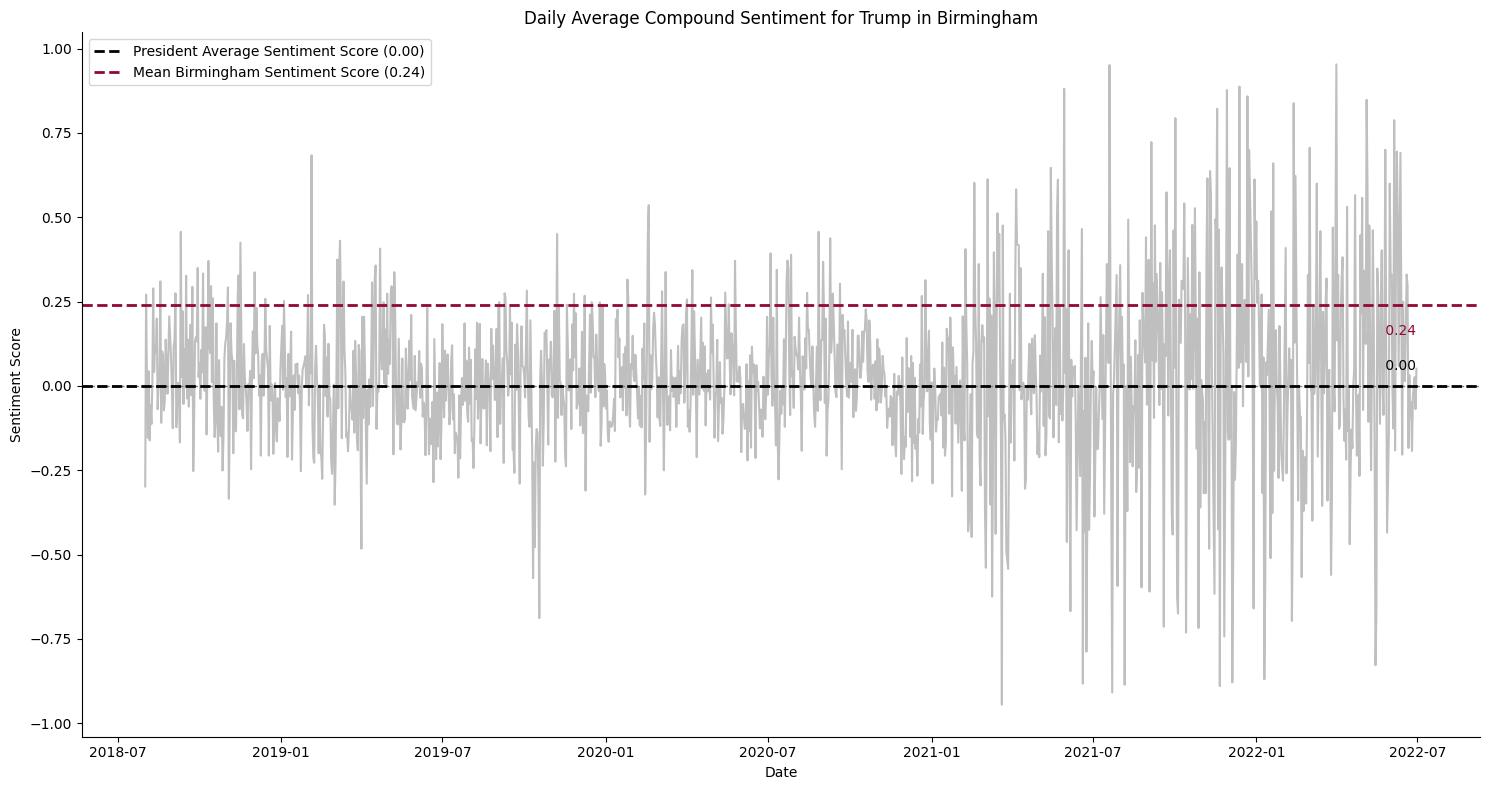

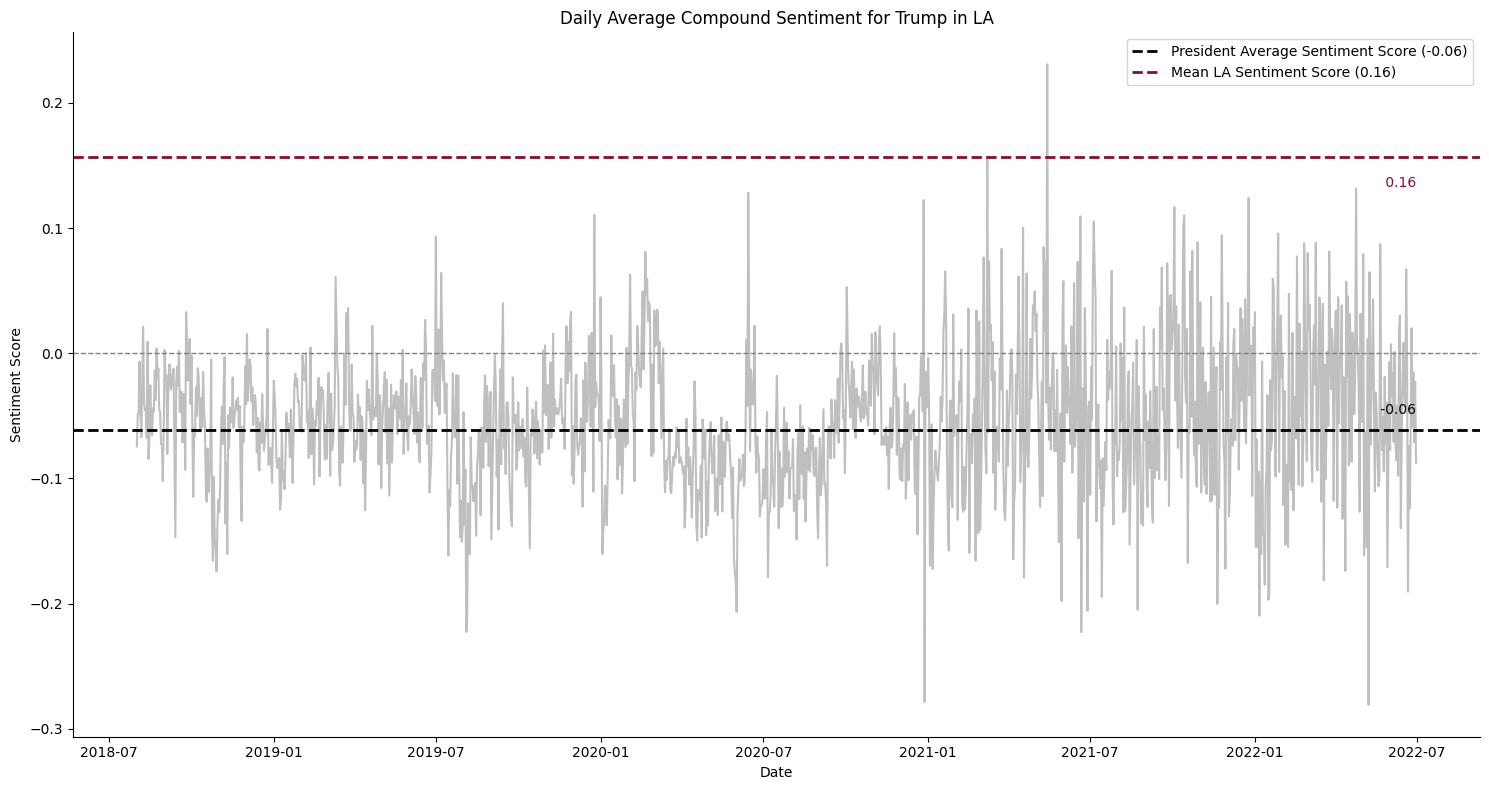

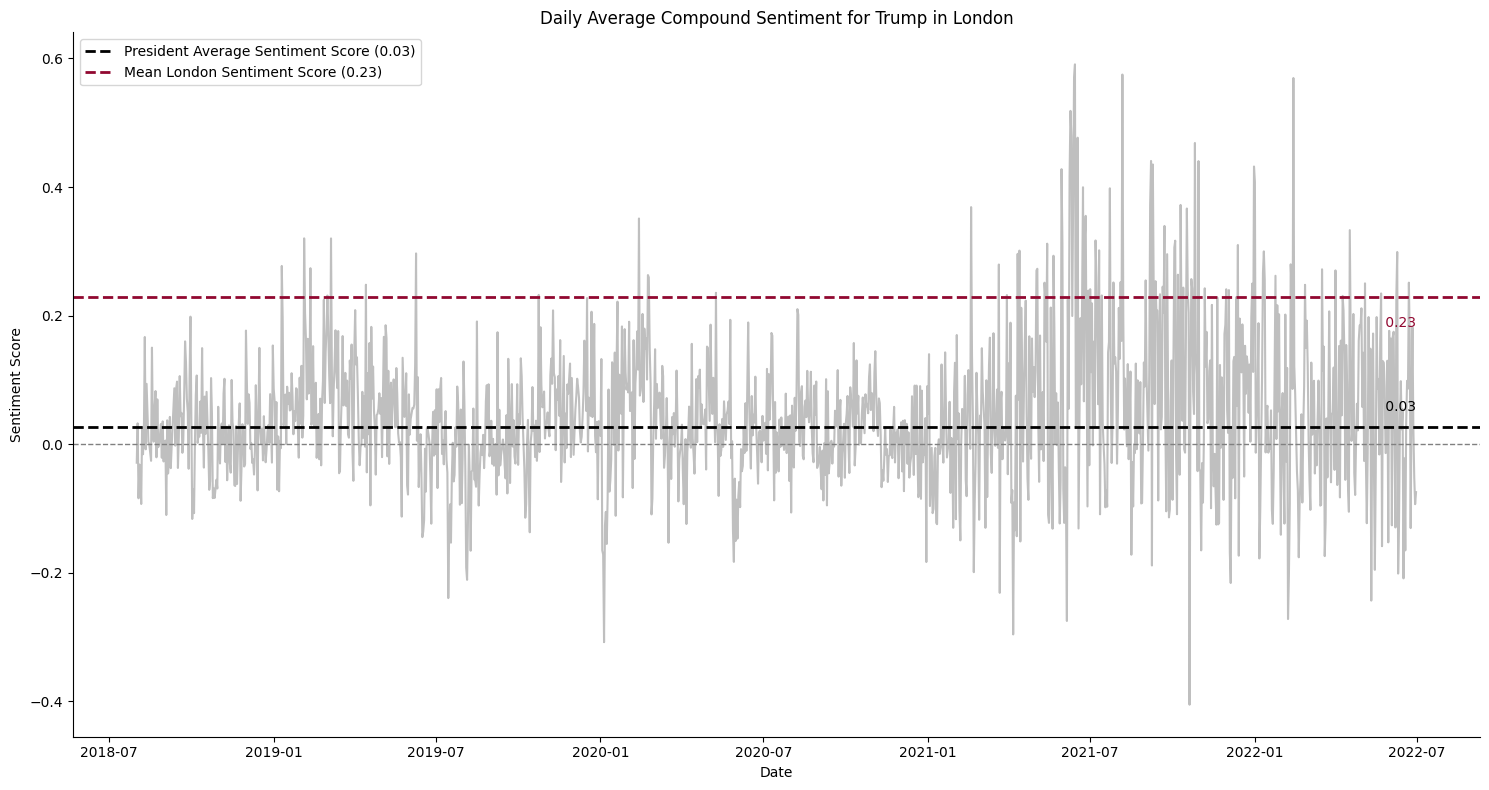

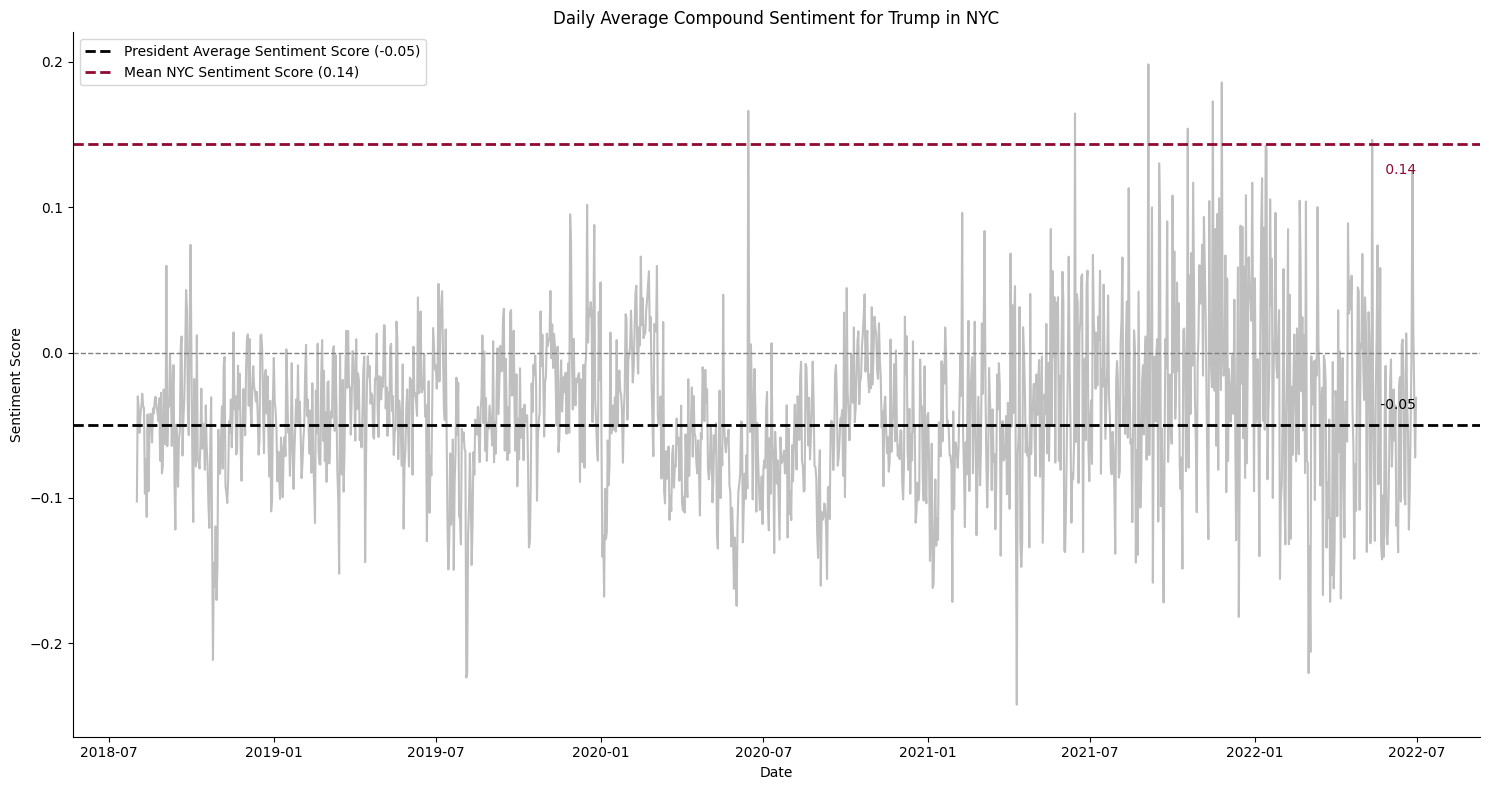

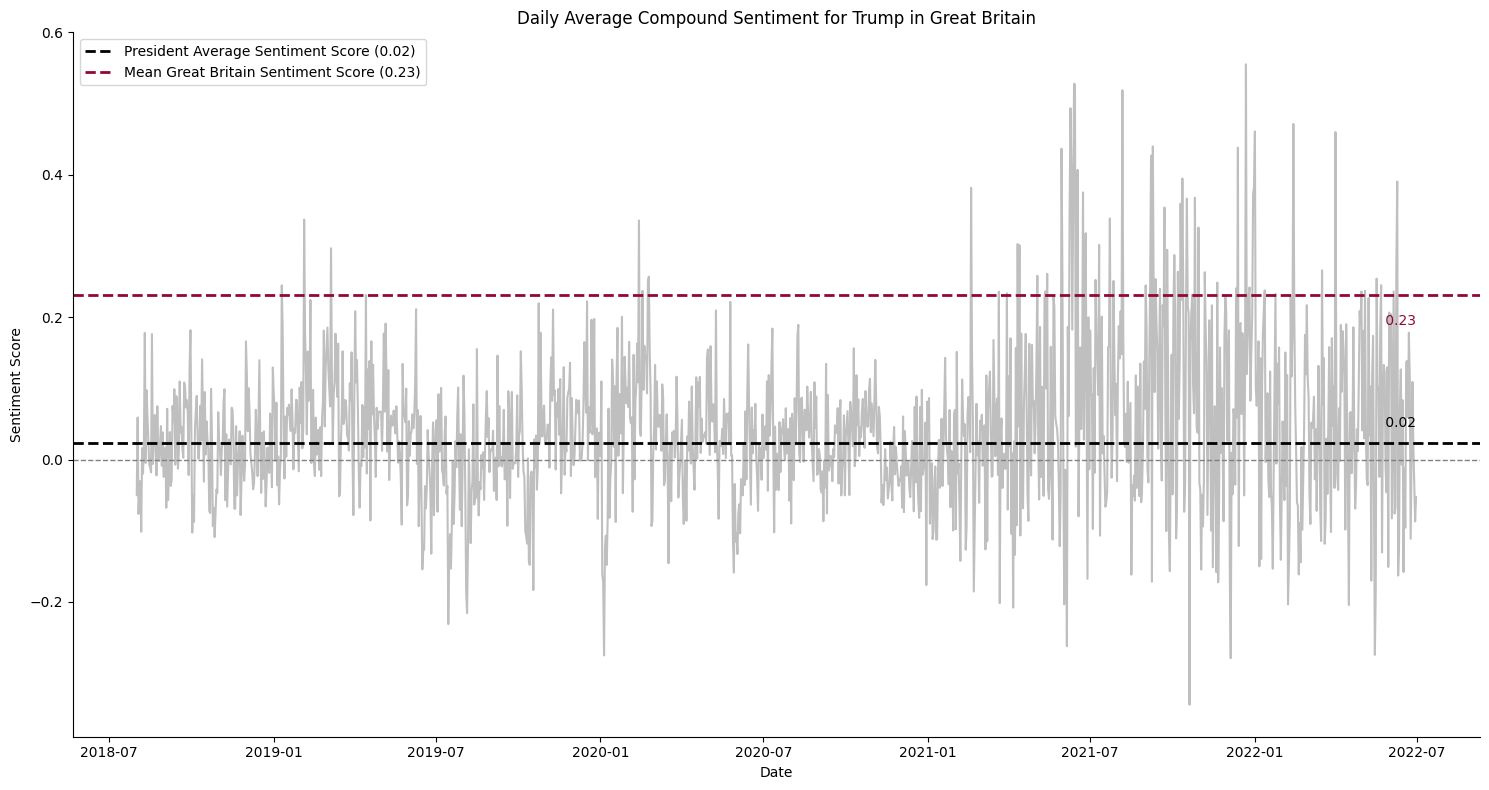

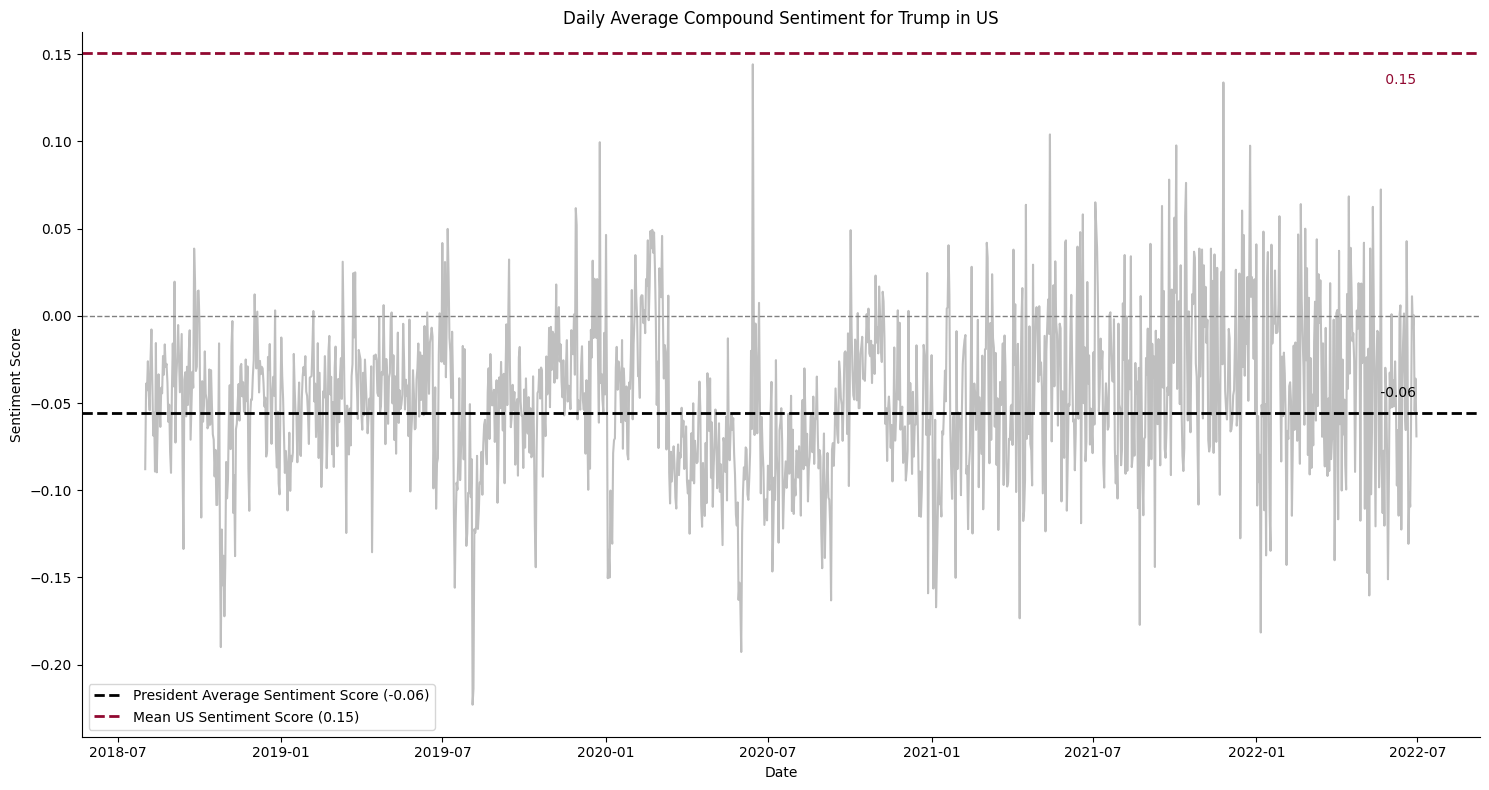

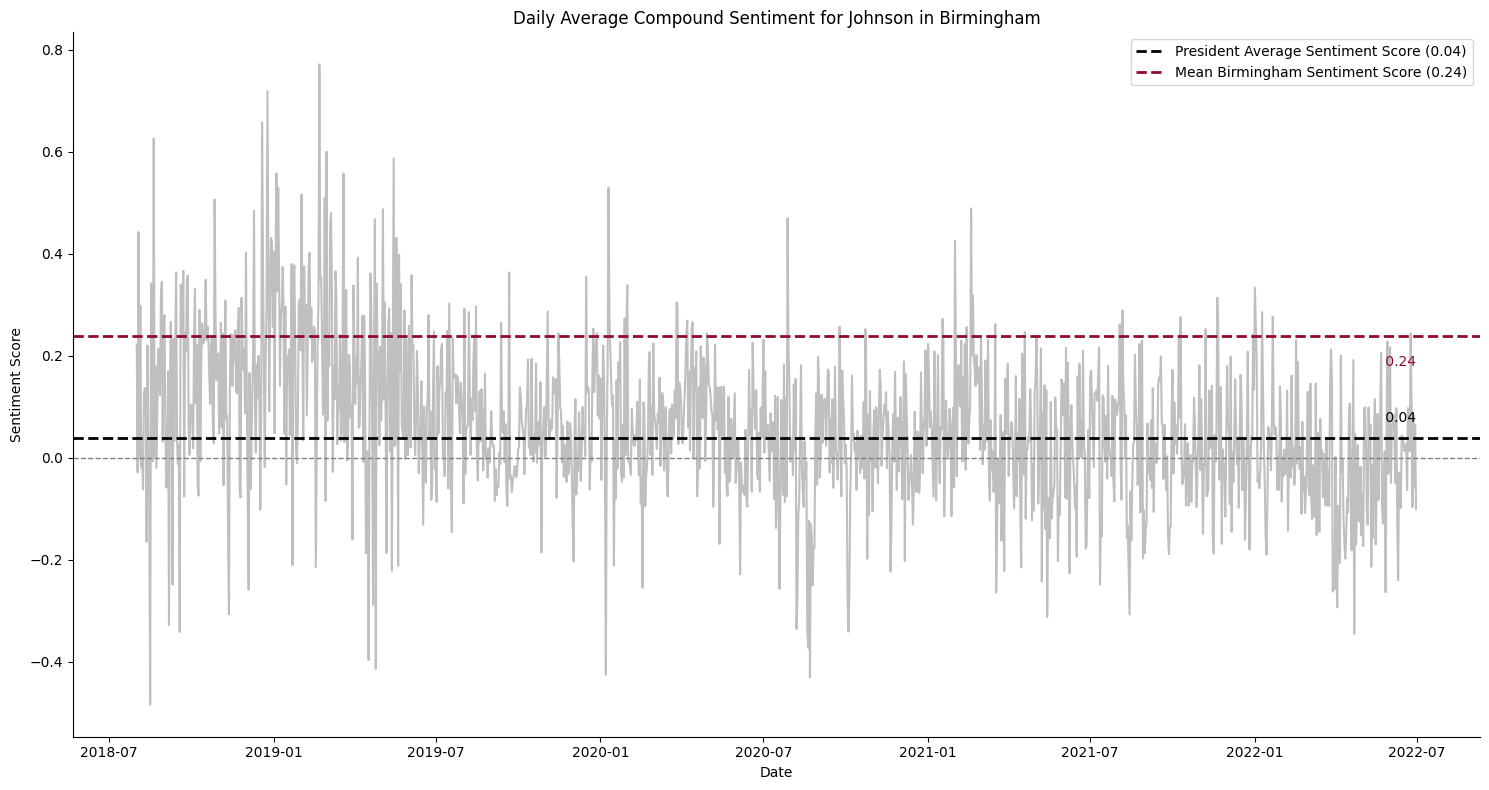

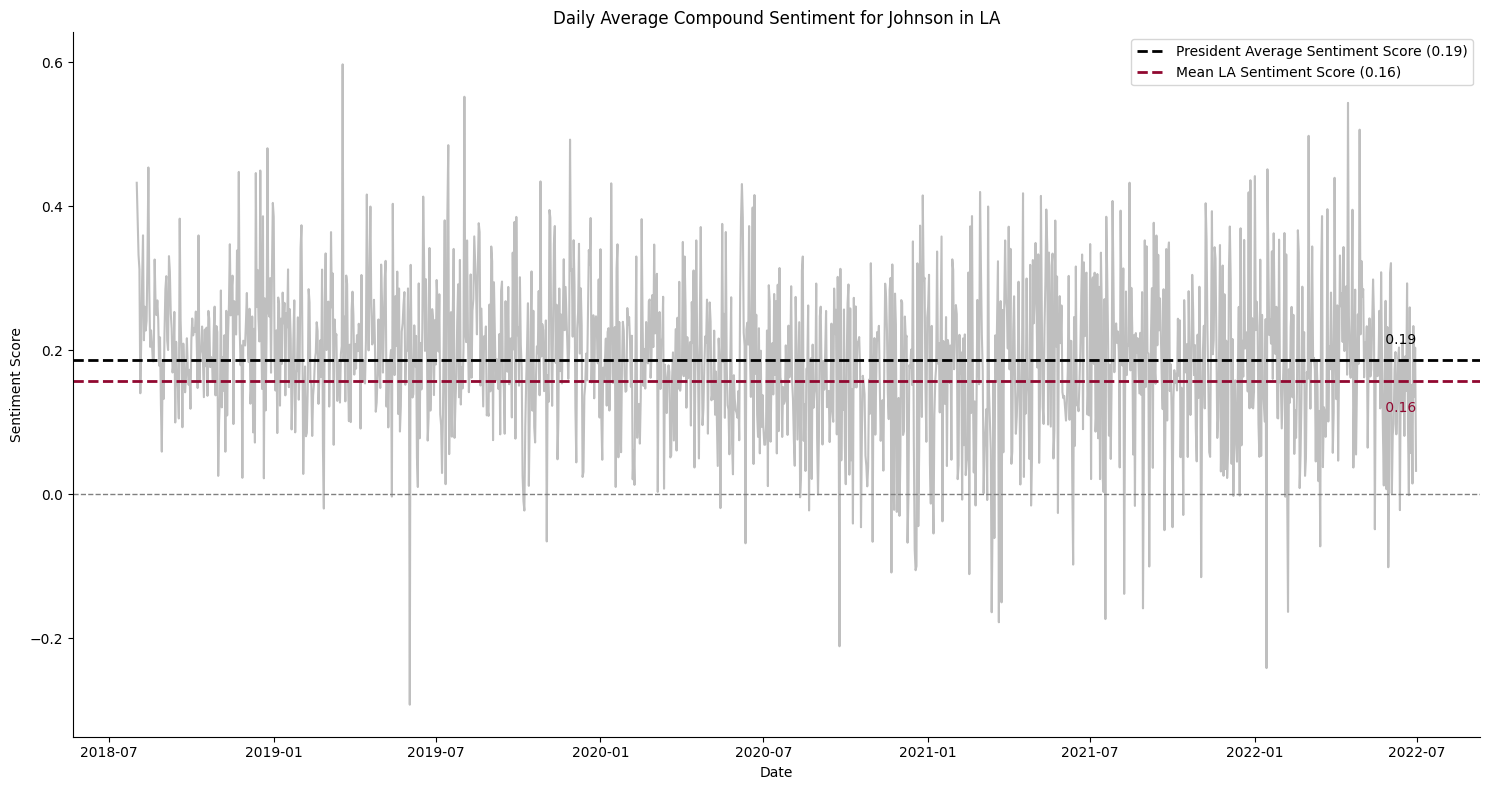

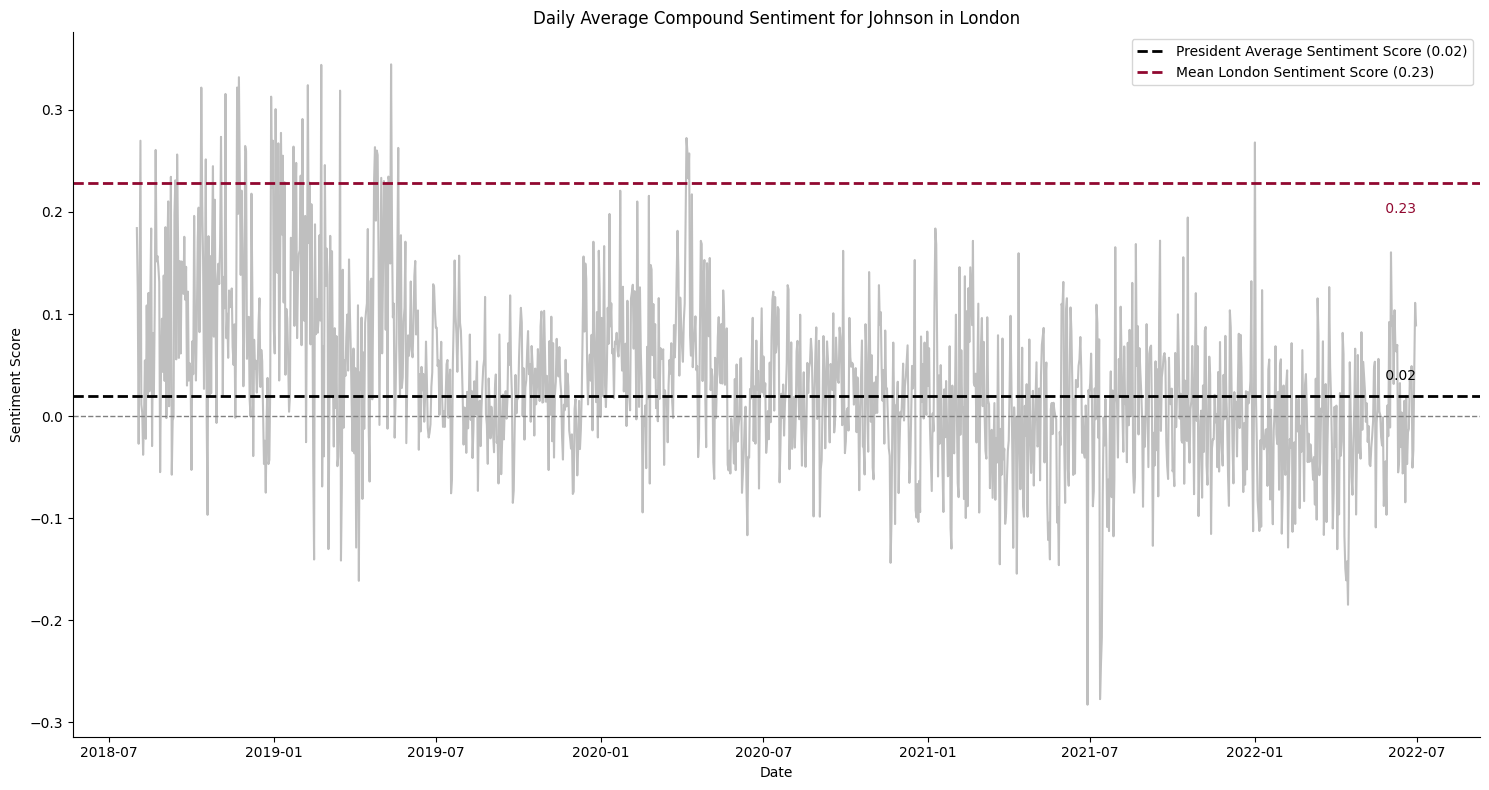

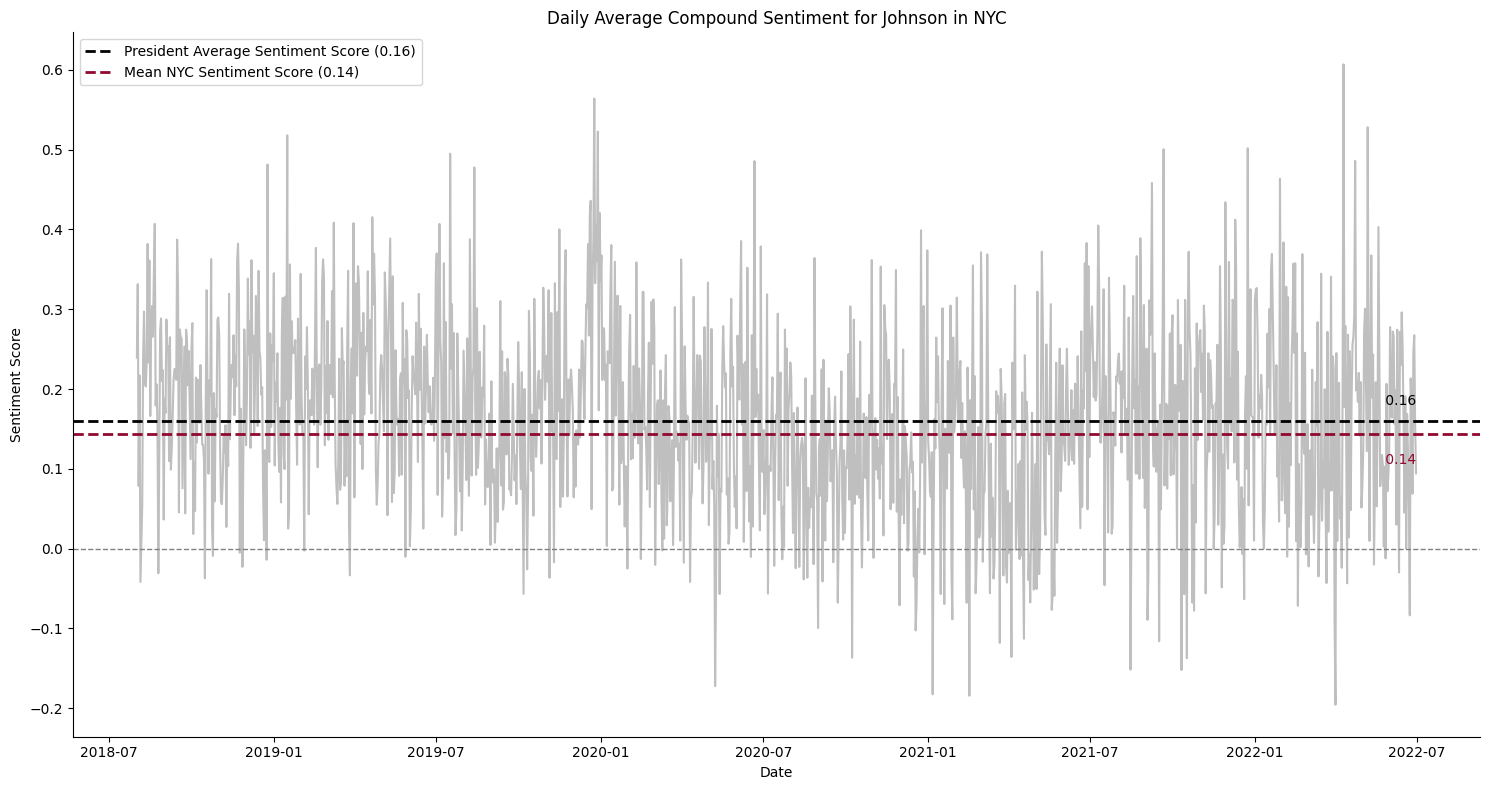

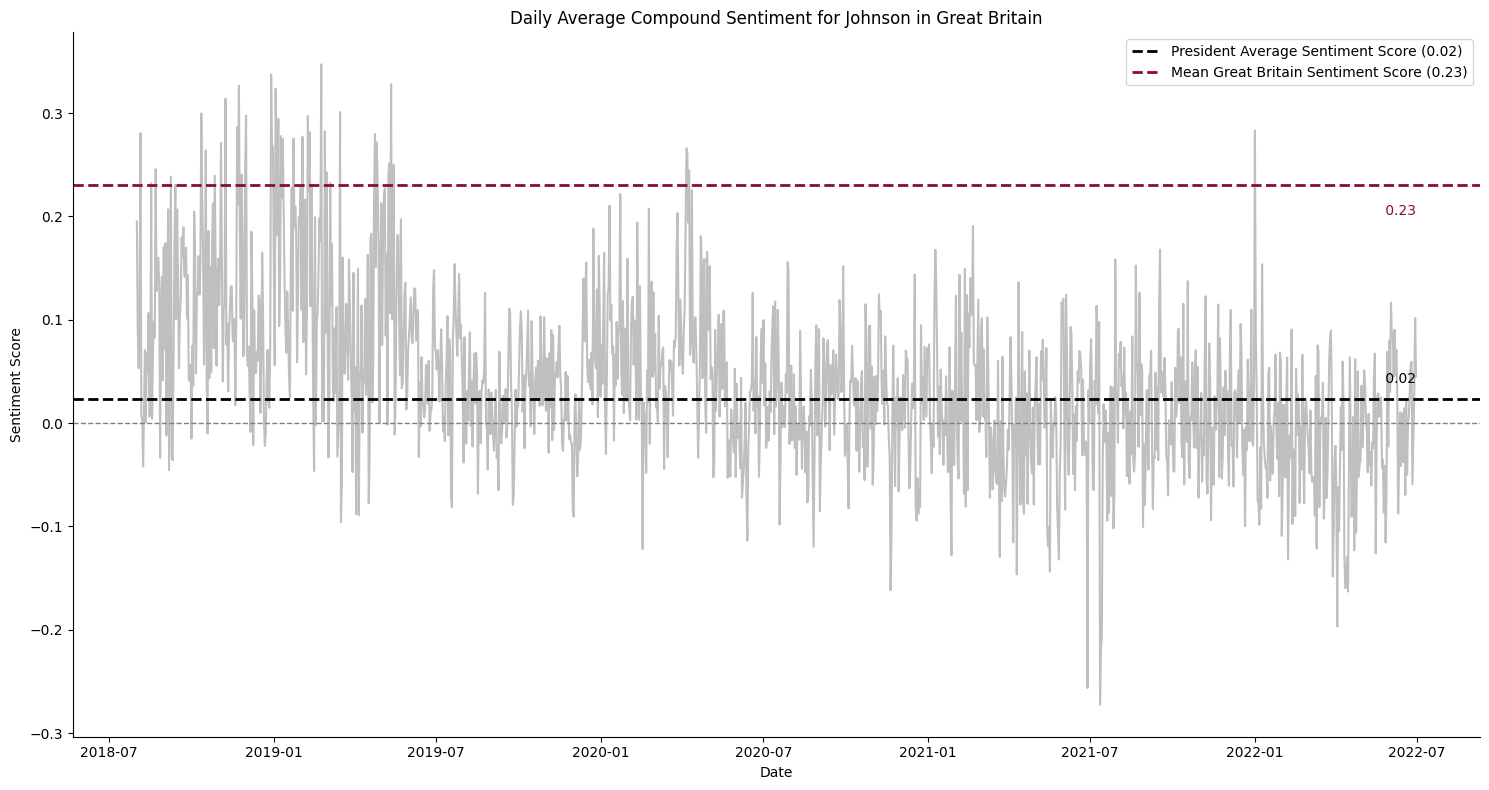

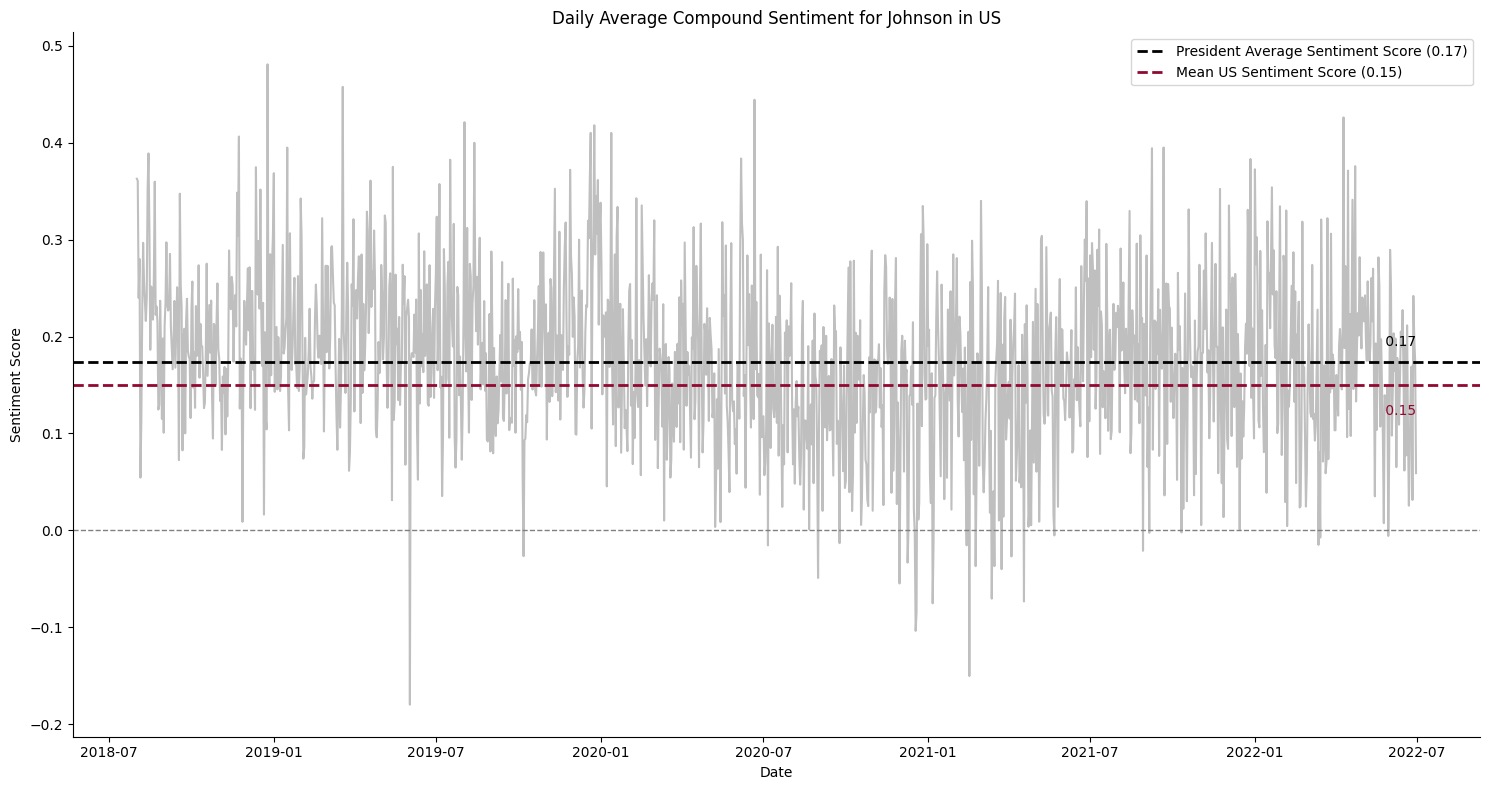

In [32]:
for president in presidents:
    for location in (cities + countries):
        title = f'Daily Average Compound Sentiment for {president.capitalize()} in {location}'
        filepath = f'{data_path}{president}-{location}.pkl'
        data = pd.read_pickle(filepath)
        data, daily_sentiment = add_day_and_get_daily_sentiment(data)
        average_compound = get_compound_mean(data)
        plot_sentiment_with_highlights_and_timeframes(daily_sentiment,
                                                title,
                                                colors=colors,
                                                average_compound=average_compound,
                                                mean_location=mean_compound.at['All',location],
                                                save_path=f'visualizations/compound_sentiment/{president}-{location}.png')

In [75]:
def plot_sentiment_with_highlights_and_timeframes(daily_sentiment, title, location, columns, averages, mean_location=None, significant_points=None, timeframe=None, colors=None, save_path=None):
    """
    Plot sentiment scores with highlights and timeframes.

    Parameters:
    daily_sentiment (DataFrame): Data containing sentiment scores.
    title (str): The title of the plot.
    columns (list): The columns from the DataFrame to plot.
    averages (list): Averages for each column to plot as horizontal lines.
    mean_location (float, optional): A location's mean sentiment to be plotted as a horizontal line.
    significant_points (list of str/datetime, optional): Points to be highlighted on the plot.
    timeframe (tuple of str/datetime, optional): A timeframe to highlight on the plot.
    colors (list): Colors for each column line and average line.
    save_path (str, optional): Path to save the figure.
    """
    plt.figure(figsize=(15, 8))
    
    # Ensure colors is a list with enough colors
    if not colors or len(colors) < len(columns):
        raise ValueError("Colors list is not provided or does not have enough colors.")
    
    # Plot lines for each sentiment column
    for i, column in enumerate(columns):
        sns.lineplot(x='day', y=column, data=daily_sentiment, color=colors[i], label=f'{column.capitalize()} Sentiment')
        if averages[i] is not None:
            plt.axhline(y=averages[i], color=colors[i], linestyle='--', linewidth=2, label=f'{column.capitalize()} Mean Sentiment({averages[i]:.2f})')

    # Highlight significant points
    if significant_points:
        for point in significant_points:
            plt.scatter(daily_sentiment['day'], daily_sentiment[point], color='red', s=50, zorder=5, label='Significant Point' if point == significant_points[0] else "")

    # Highlight the timeframe
    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]), pd.to_datetime(timeframe[1]), color='yellow', alpha=0.3, label='Significant Period')

    # Plot mean location horizontal line
    if mean_location is not None:
        plt.axhline(y=mean_location, color='green', linestyle='--', linewidth=2, label=f'Mean Sentiment in {location} ({mean_location:.2f})')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    sns.despine()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()


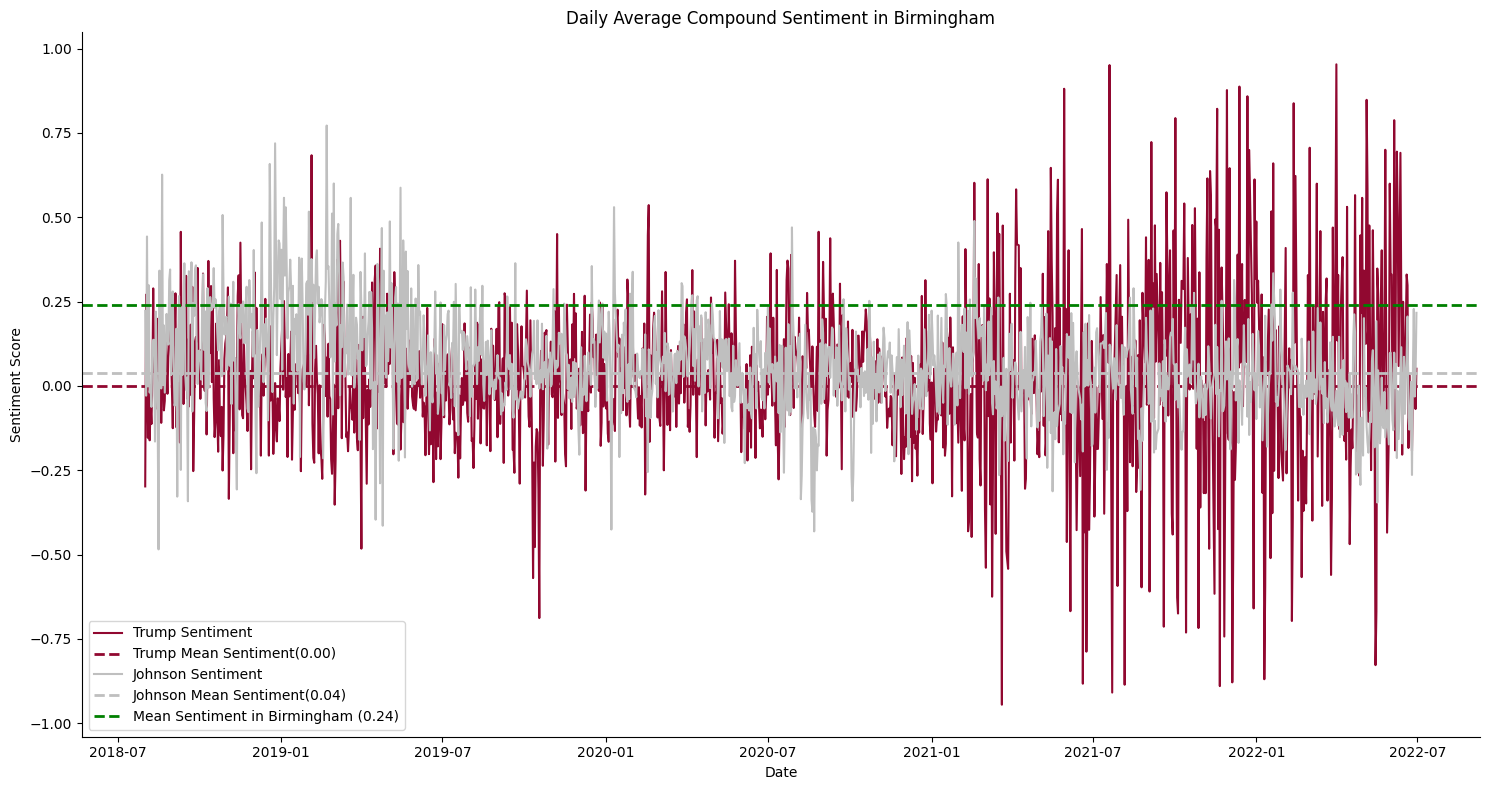

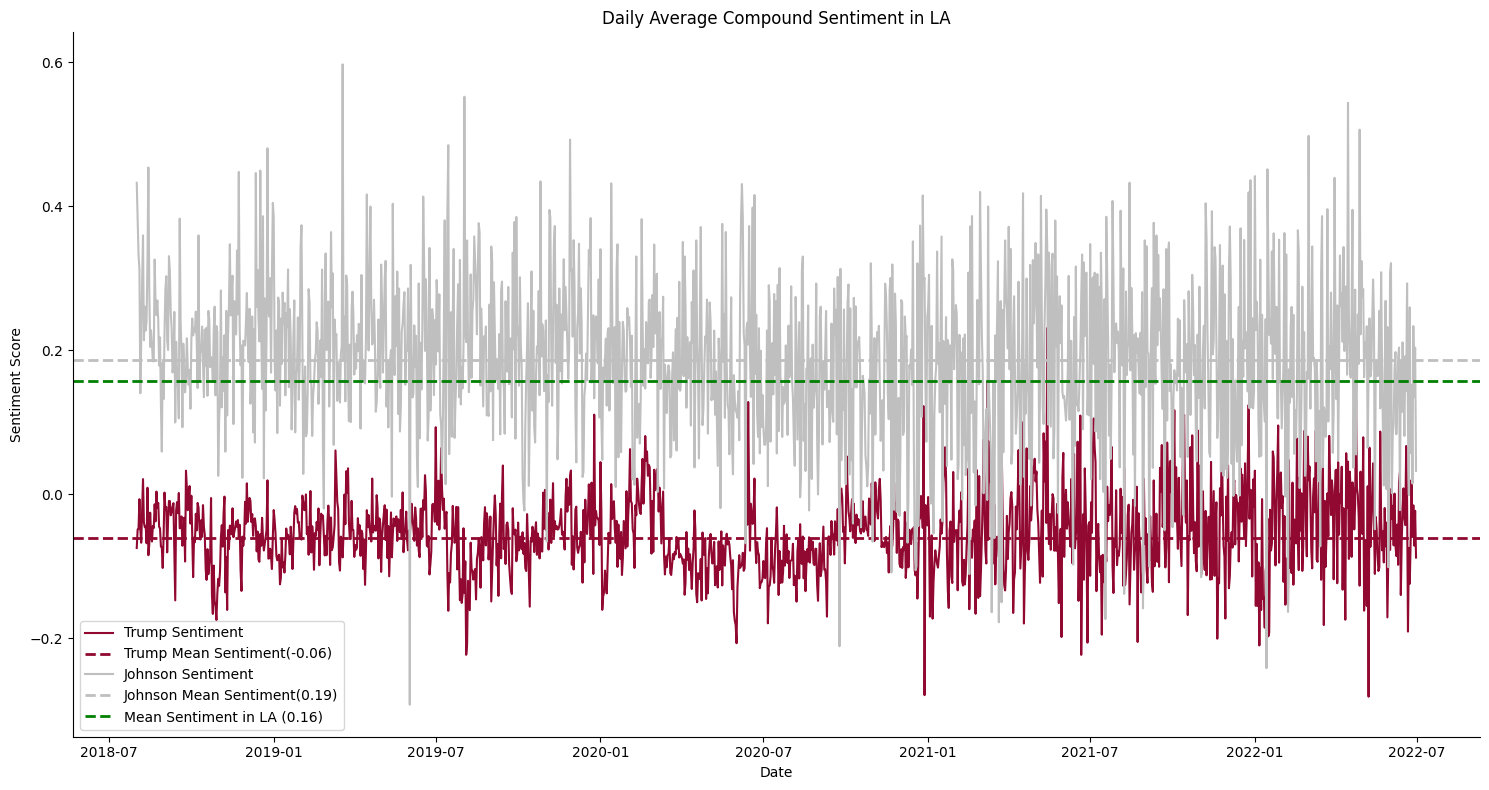

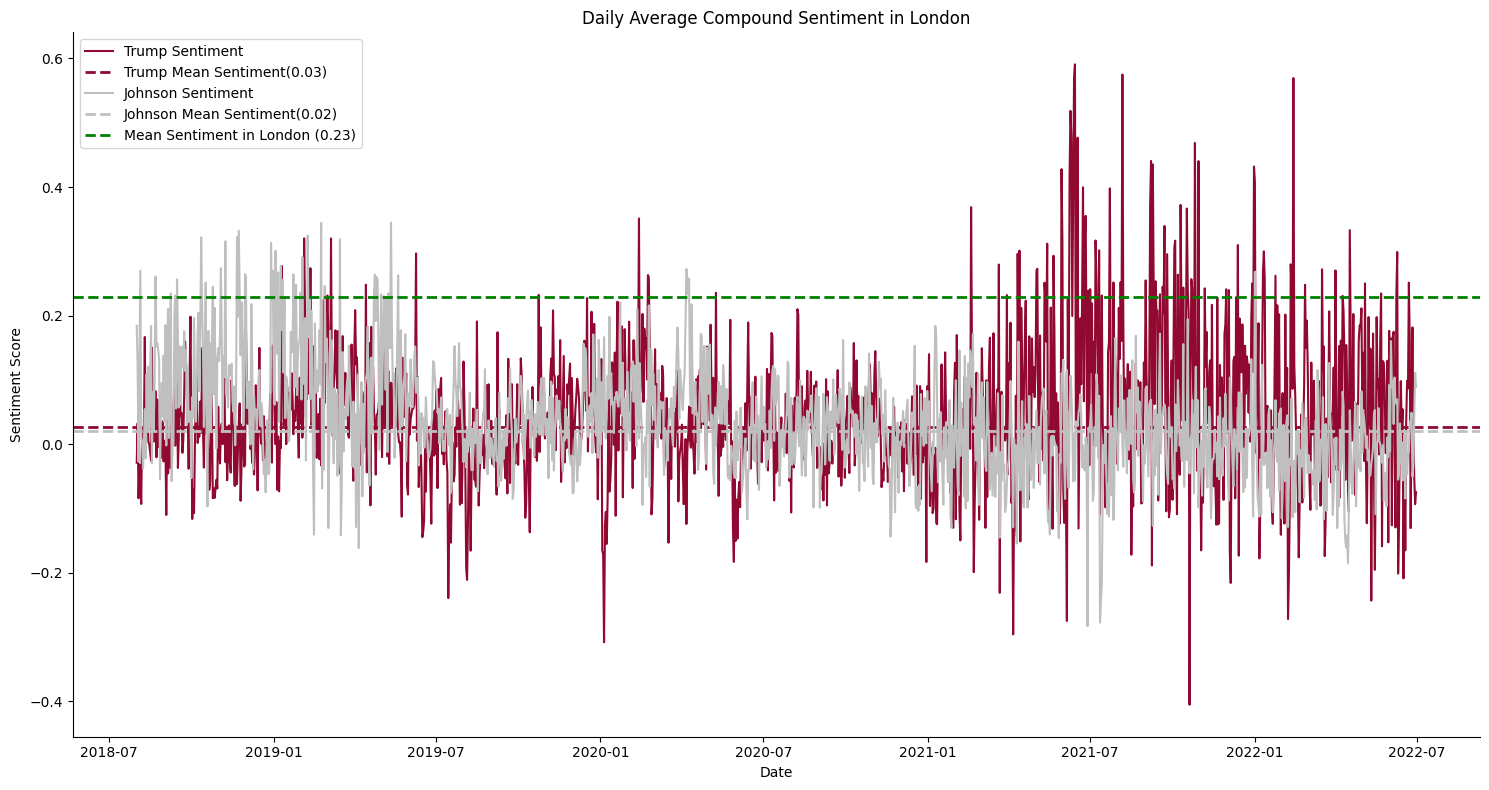

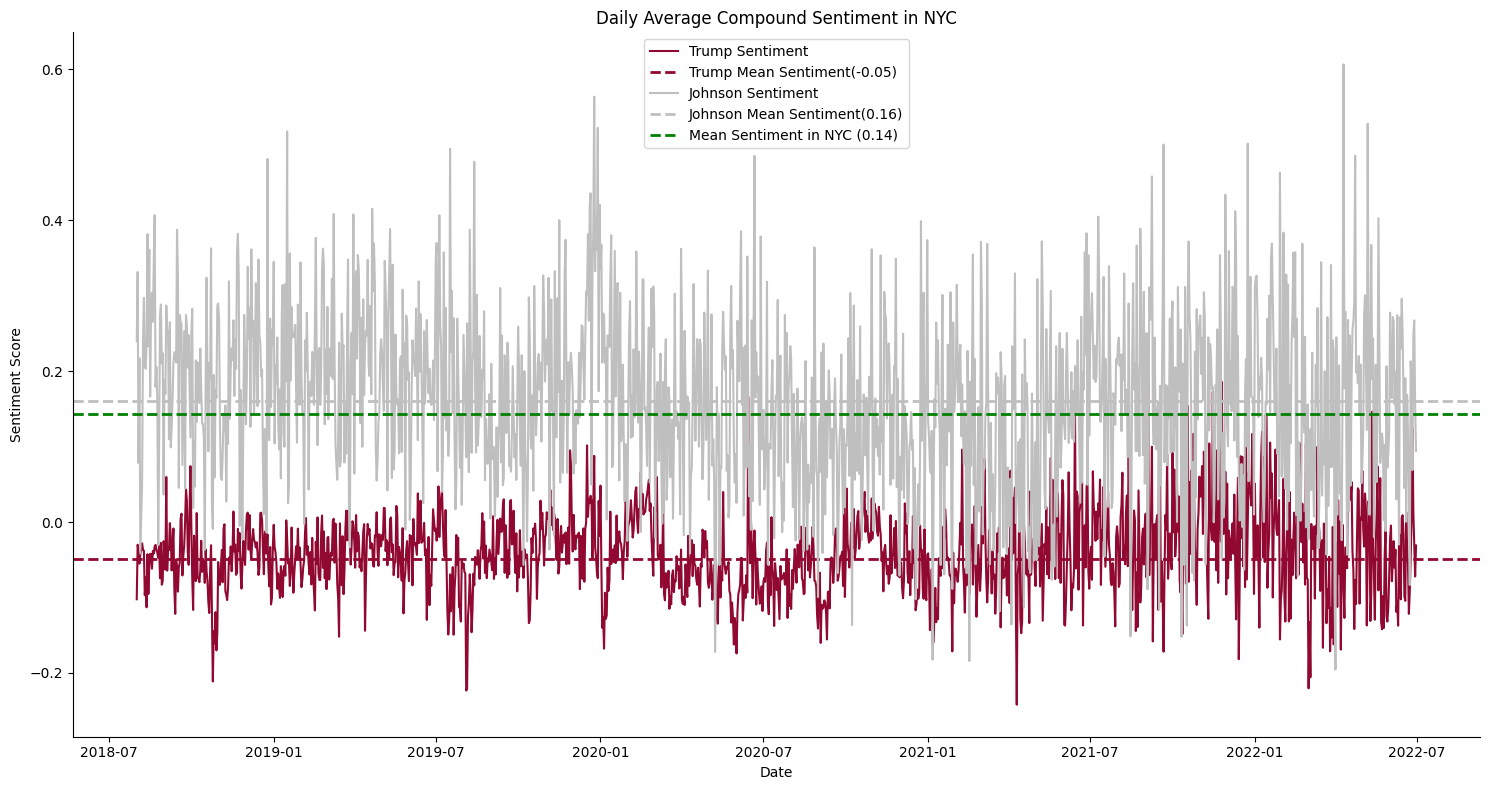

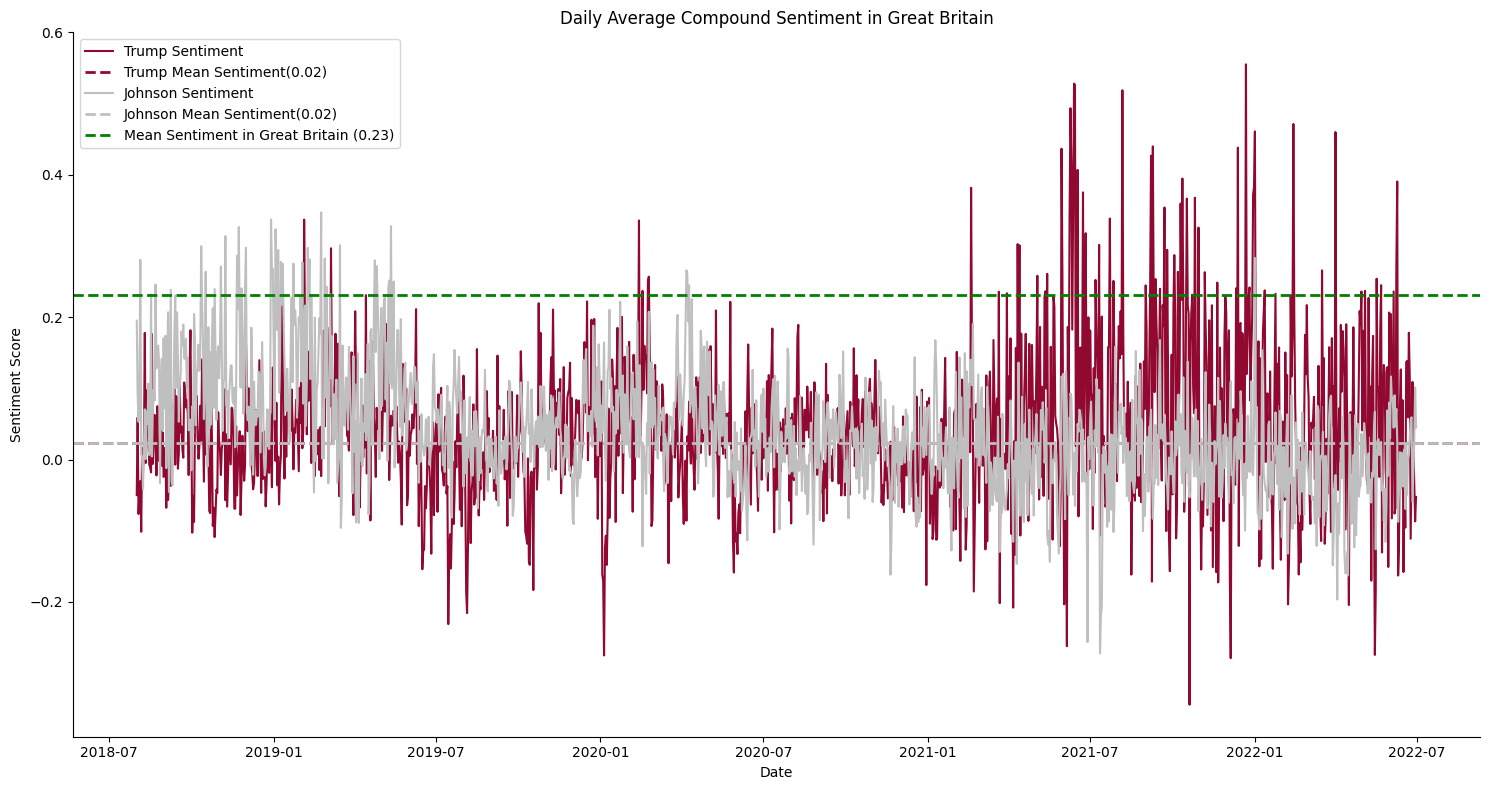

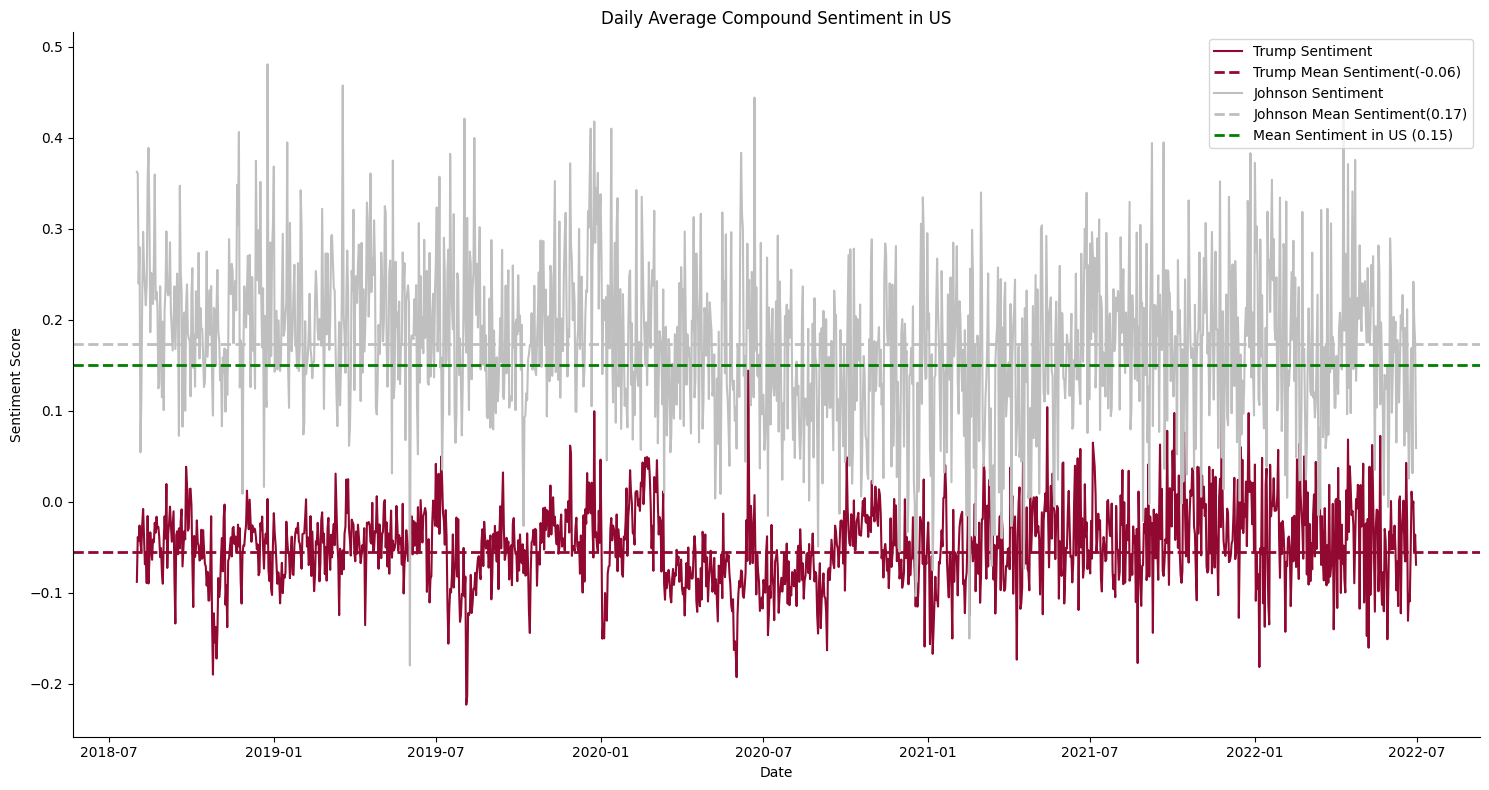

In [74]:
for location in (cities + countries):
    title = f'Daily Average Compound Sentiment in {location}'
    filepath_trump = f'{data_path}trump-{location}.pkl'
    filepath_johnson = f'{data_path}johnson-{location}.pkl'
    trump = pd.read_pickle(filepath_trump)
    johnson = pd.read_pickle(filepath_johnson)
    trump, trump_daily_sentiment = add_day_and_get_daily_sentiment(trump)
    johnson, johnson_daily_sentiment = add_day_and_get_daily_sentiment(johnson)
    trump_average_compound = get_compound_mean(trump)
    johnson_average_compound = get_compound_mean(johnson)
    presidents_daily_sentiment = trump_daily_sentiment.rename(columns={'Compound': presidents[0]})
    presidents_daily_sentiment[presidents[1]] = johnson_daily_sentiment['Compound']
    
    plot_sentiment_with_highlights_and_timeframes(presidents_daily_sentiment,
                                            title=title,
                                            location=location,
                                            columns=['trump', 'johnson'],
                                            averages=[trump_average_compound, johnson_average_compound],
                                            mean_location=mean_compound.at['All',location],
                                            colors=colors,
                                            save_path=f'visualizations/compound_sentiment/presidents-{location}.png')

# Aggregated Tweet Count

In [6]:
def aggregate_daily_counts(df, date_column='day'):
    """
    Aggregate the total count of rows for each day in a dataframe.

    Parameters:
    df (DataFrame): The original dataframe with a 'day' column.
    date_column (str): The name of the column containing the dates. Defaults to 'day'.

    Returns:
    DataFrame: A new dataframe with columns 'day' and 'tweet_count', representing the count of rows per day.
    """
    return df.groupby(date_column).size().reset_index(name='tweet_count')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_daily_tweet_counts(tweet_counts, title, count_columns, colors=colors, timeframe=None, save_path=None, highlight_top_ten=None):
    """
    Plot the daily tweet counts for multiple series with a modern design, including options for highlights and timeframes. Highlights the top ten tweet counts for each series.

    Parameters:
    tweet_counts (DataFrame): Data containing the daily tweet counts with columns 'day' and multiple 'tweet_count_X' columns.
    title (str): The title of the plot.
    count_columns (list): List of column names containing the tweet counts to be plotted.
    colors (list, optional): Colors for the tweet count lines. If None, default colors will be used.
    timeframe (tuple of str/datetime, optional): A timeframe to highlight on the plot.
    save_path (str, optional): Path to save the figure.
    highlight_top_ten (bool, optional): Whether to highlight the top ten tweet counts.
    """
    plt.figure(figsize=(15, 8))
    
    if colors is None:
        colors = sns.color_palette('husl', len(count_columns))  # Generate as many colors as count columns
    
    # Plot each tweet count line
    for i, count_column in enumerate(count_columns):
        sns.lineplot(x='day', y=count_column, data=tweet_counts, color=colors[i], label=count_column)
        
        if highlight_top_ten:
            # Sort the DataFrame by 'tweet_count' column in descending order and take the top ten
            top_ten_tweet_counts = tweet_counts.sort_values(by=count_column, ascending=False).head(10)
            # Highlight the top ten tweet counts
            for _, row in top_ten_tweet_counts.iterrows():
                point_datetime = pd.to_datetime(row['day'])
                tweet_count_at_point = row[count_column]
                plt.scatter(point_datetime, tweet_count_at_point, color=colors[i], s=50, zorder=5)
                # Adjusted text positioning
                text_x_position = point_datetime - pd.Timedelta(days=-10)  # Adjust as needed for your specific date format and plot
                plt.text(text_x_position, tweet_count_at_point, f"{row['day']}\n{tweet_count_at_point}", color='black', ha='left', va='bottom')

    # Highlight the timeframe
    if timeframe:
        plt.axvspan(pd.to_datetime(timeframe[0]), pd.to_datetime(timeframe[1]), color='yellow', alpha=0.3, label='Highlighted Period')

    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Tweet Count')
    sns.despine()
    plt.legend()
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, format='png', bbox_inches='tight')
    plt.show()


In [8]:
daily_tweet_counts_trump = pd.DataFrame(columns=['day'] + countries + cities)
daily_tweet_counts_johnson = pd.DataFrame(columns=['day'] + countries + cities)

In [9]:
def aggregate_tweet_count(president):
    daily_tweet_counts = pd.DataFrame(columns=['day', 'All'] + countries + cities)
    for location in countries + cities:
        filepath = f'{data_path}{president}-{location}.pkl'
        # load data
        data = pd.read_pickle(filepath)
        # add day
        data, _ = add_day_and_get_daily_sentiment(data)
        # aggregate day to get daily tweet count
        aggregated_data = aggregate_daily_counts(data)
        daily_tweet_counts[location] = aggregated_data['tweet_count']
    daily_tweet_counts['day'] = aggregated_data['day']
    daily_tweet_counts.set_index('day')
    # calculate 'All'
    filepath = f'{data_path}{president}.pkl'
    data = pd.read_pickle(filepath)
    data, _ = add_day_and_get_daily_sentiment(data)
    aggregated_data = aggregate_daily_counts(data)
    daily_tweet_counts['All'] = aggregated_data['tweet_count']
    return daily_tweet_counts

In [10]:
daily_tweet_counts_trump = aggregate_tweet_count(presidents[0])
daily_tweet_counts_johnson = aggregate_tweet_count(presidents[1])

In [11]:
daily_tweet_counts_trump.head()

day   All  Great Britain    US  Birmingham    LA  London  NYC
0  2018-08-01  2069            191  1878        15.0   969     176  909
1  2018-08-02  1724            161  1563        18.0   736     143  827
2  2018-08-03  1400            146  1254        14.0   623     132  631
3  2018-08-04  2258            188  2070        18.0  1243     170  827
4  2018-08-05  1815            197  1618        27.0   807     170  811

In [12]:
daily_tweet_counts_johnson.head()

day  All  Great Britain  US  Birmingham  LA  London  NYC
0  2018-08-01  154             89  65          24  39      65   26
1  2018-08-02  149             57  92          10  53      47   39
2  2018-08-03  126             46  80           7  51      39   29
3  2018-08-04  125             59  66          12  41      47   25
4  2018-08-05  137             58  79          17  28      41   51

In [13]:
def get_top_dates(df, column, nlargest=10):
    """
    Get the rows corresponding to the highest 10 values of a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The name of the column to find the top 10 values in.

    Returns:
    DataFrame: A DataFrame containing the rows with the top 10 values of the specified column.
    """
    return df.nlargest(nlargest, column)

In [20]:
locations = countries + cities
for president in presidents:
    data = daily_tweet_counts_trump if president == president[0] else daily_tweet_counts_johnson
    for location in locations:
        print(president.capitalize(), location)
        print(get_top_dates(data, location)[['day', location]].to_string(index=False),"\n")

Trump Great Britain
       day  Great Britain
2020-05-24           2463
2019-07-23           1988
2020-05-10           1898
2020-05-25           1648
2020-10-31           1556
2020-04-06           1553
2019-12-13           1526
2019-07-24           1491
2019-09-24           1460
2022-06-06           1323 

Trump US
       day  US
2019-04-10 288
2019-09-24 236
2019-07-23 224
2020-07-23 198
2019-12-12 177
2019-12-13 175
2020-04-06 171
2019-10-06 168
2019-02-14 157
2019-05-20 152 

Trump Birmingham
       day  Birmingham
2019-06-21         696
2020-05-24         499
2019-07-23         386
2019-06-23         385
2020-05-10         365
2019-06-22         341
2020-04-06         332
2020-10-31         305
2020-05-25         299
2019-08-28         284 

Trump LA
       day  LA
2019-04-10 209
2020-07-23 120
2020-12-27 104
2019-02-14 101
2019-07-23  97
2019-02-07  96
2019-02-05  94
2020-02-16  91
2018-10-29  90
2019-10-06  89 

Trump London
       day  London
2020-05-24    1964
2019-07-23    160

In [15]:
total_count = pd.read_pickle('results/total_count.pkl')
total_count = total_count.rename(columns={"Total": "All"})

In [21]:
tweets_per_day = pd.DataFrame(columns=locations)

for president in presidents:
    data = daily_tweet_counts_trump if president == president[0] else daily_tweet_counts_johnson
    for col in locations:
        tweets_per_day.at['All', col] = total_count.at['All', col] / data.shape[0]

population_key = 'Population'
# population in million - based on Google search on 03.02.2024
tweets_per_day.at[population_key, 'NYC'] = 8468
tweets_per_day.at[population_key, 'LA'] = 3849
tweets_per_day.at[population_key, 'Birmingham'] = 1149
tweets_per_day.at[population_key, 'London'] = 8982
tweets_per_day.at[population_key, 'Great Britain'] = tweets_per_day.at[population_key, 'Birmingham'] + tweets_per_day.at[population_key, 'London']
tweets_per_day.at[population_key, 'US'] = tweets_per_day.at[population_key, 'LA'] + tweets_per_day.at[population_key, 'NYC']

tweets_per_day.loc['Posts per Inhabitant'] = tweets_per_day.loc['All'] / tweets_per_day.loc[population_key]

del data
tweets_per_day

Great Britain            US   Birmingham            LA  \
All                   26079.681818  54831.086713  4999.236364  28985.386713   
Population                   10131         12317         1149          3849   
Posts per Inhabitant      2.574246      4.451659     4.350945      7.530628   

                            London       NYC  
All                   21080.445455   25845.7  
Population                    8982      8468  
Posts per Inhabitant      2.346966  3.052161

In [17]:
def normalize(df, cols, divisors=total_count):
    """
    Normalizes the specified columns in the dataframe by dividing by the mean of each column.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    cols (list): A list of column names to be normalized.

    Returns:
    DataFrame: A dataframe with the specified columns normalized.
    """
    normalized_df = df.copy()
    for col in cols:
        # divisor is the mean number of tweets per day
        divisor = divisors.at['All', col] / data.shape[0]
        normalized_df[col] = df[col] / divisor if divisor != 0 else df[col]
    return normalized_df


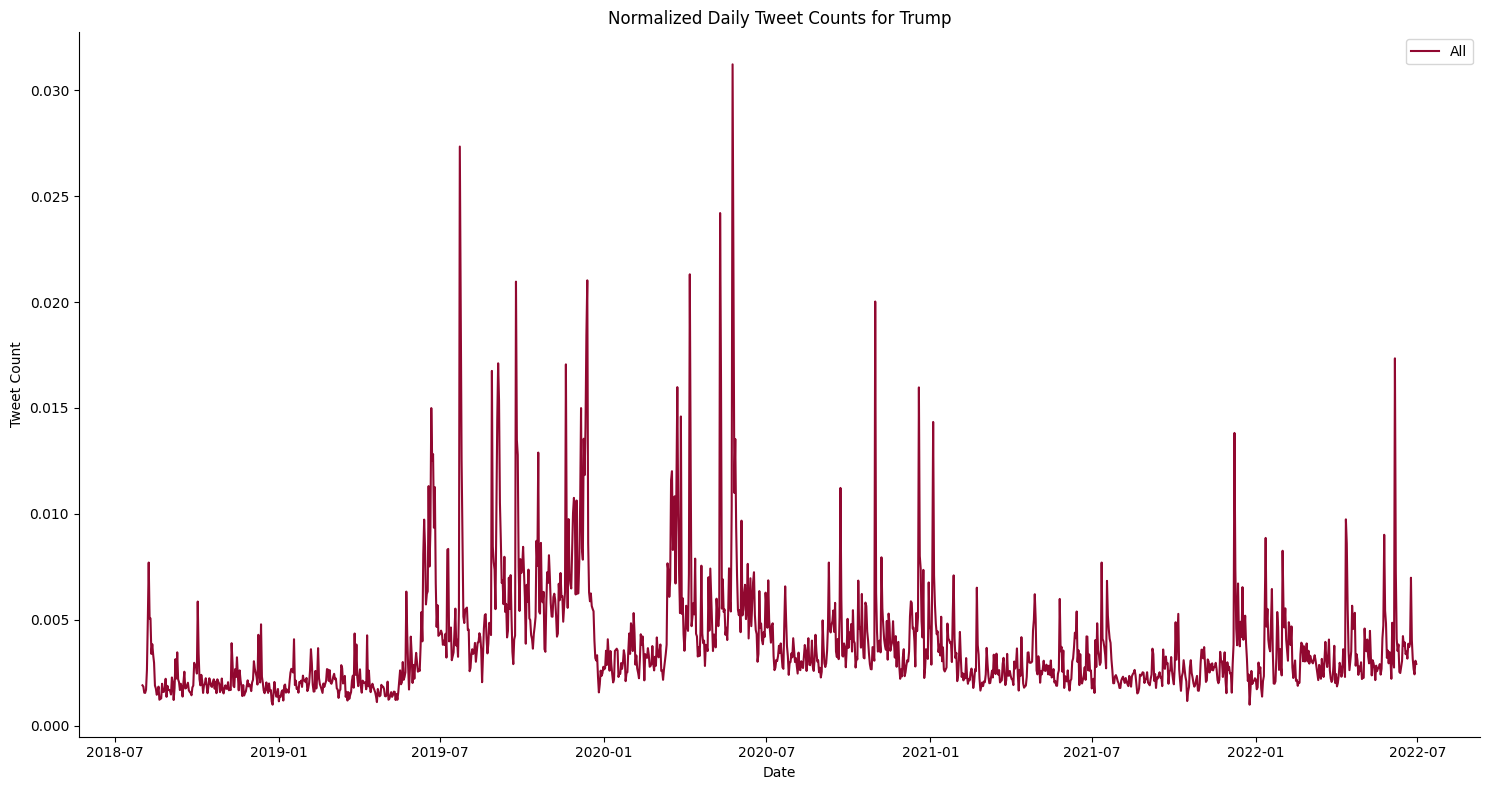

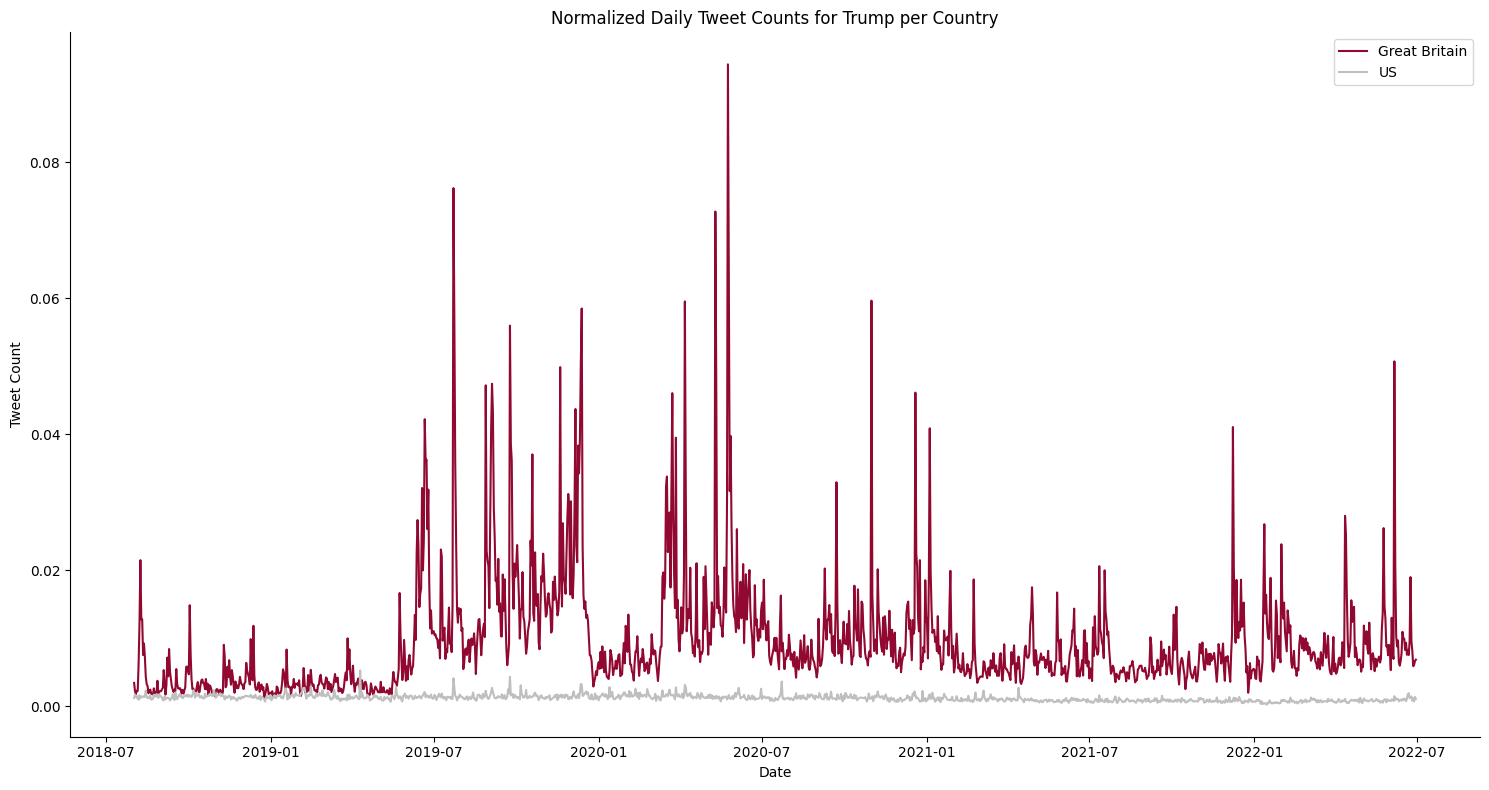

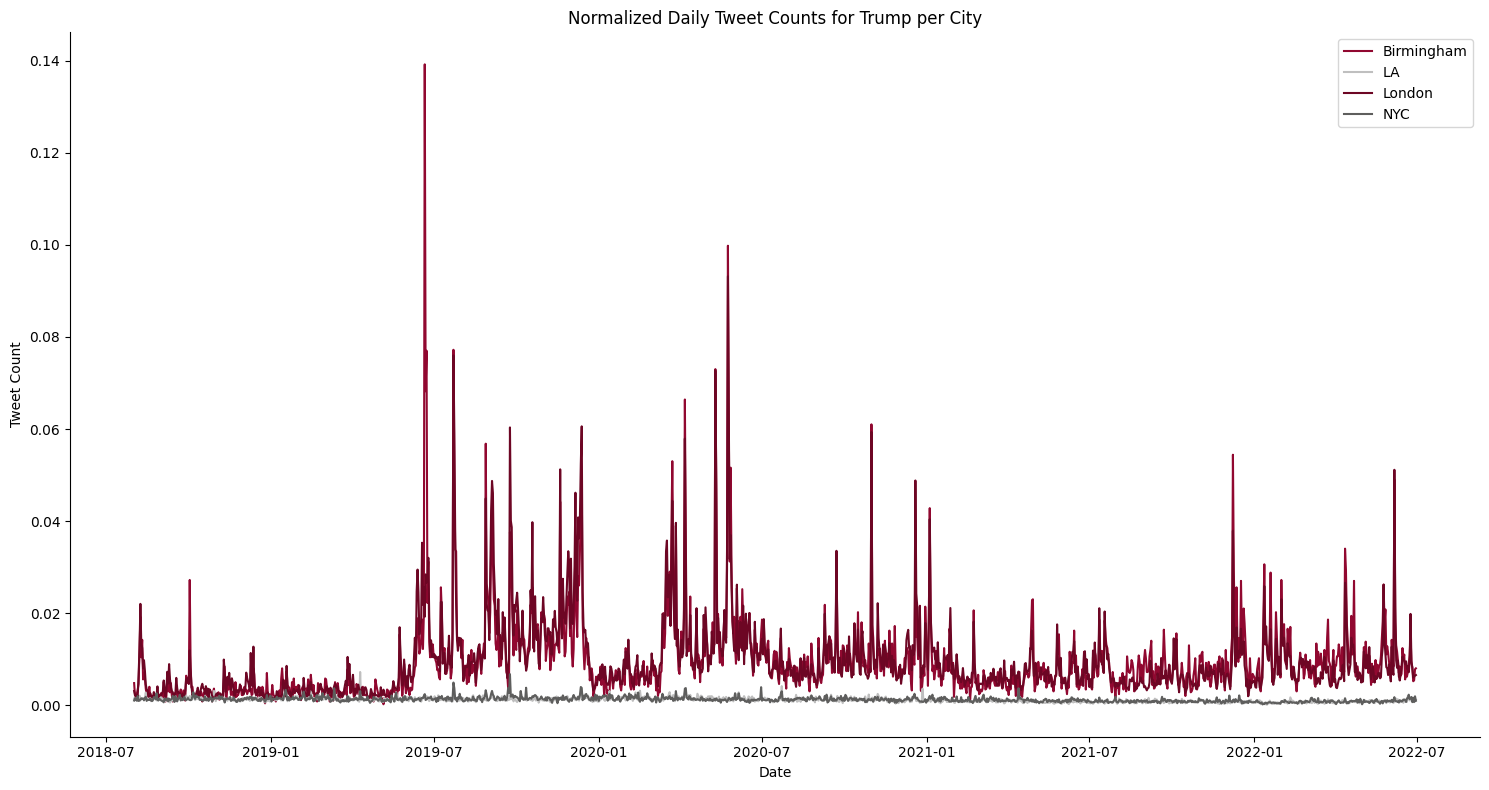

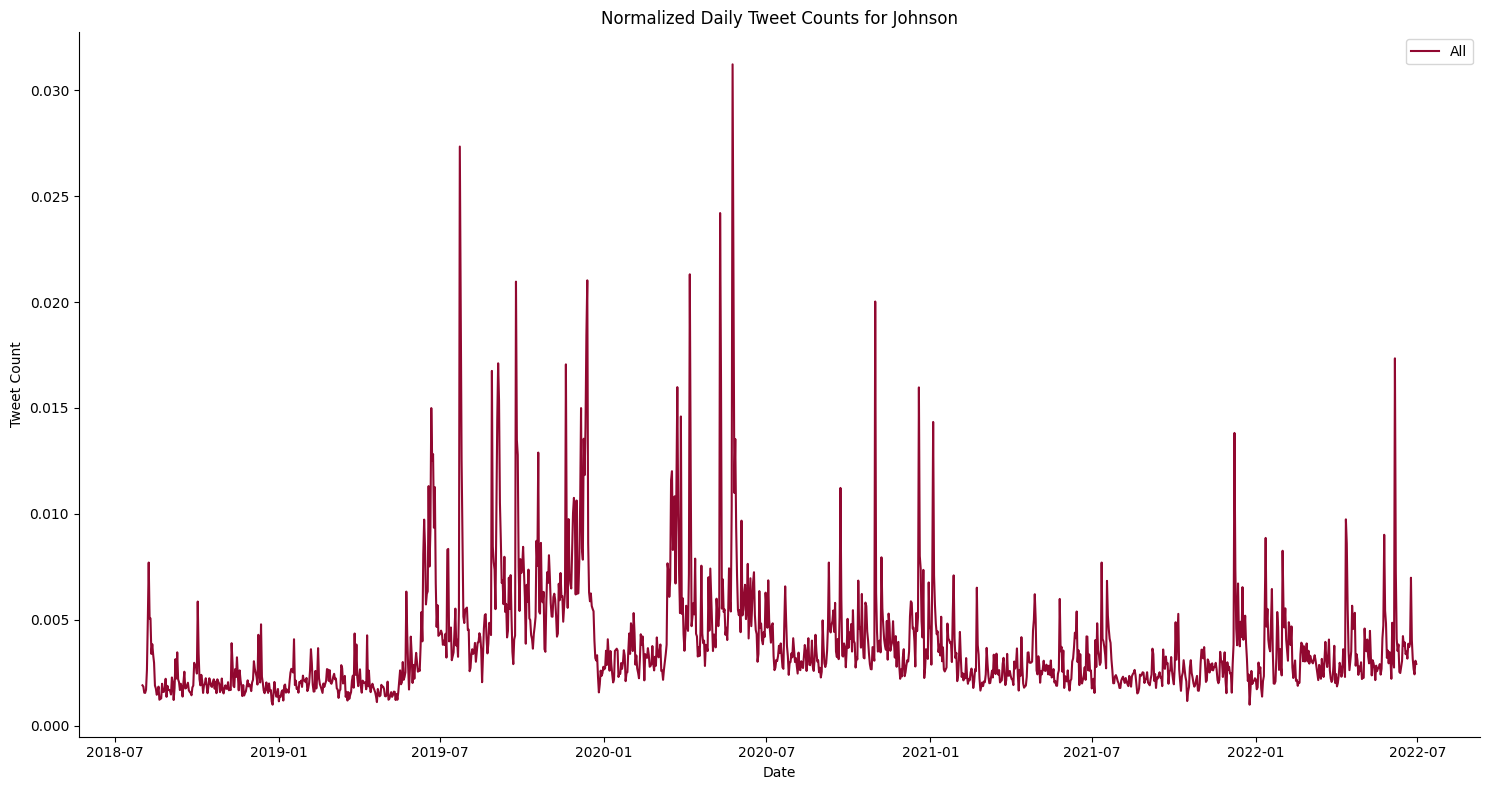

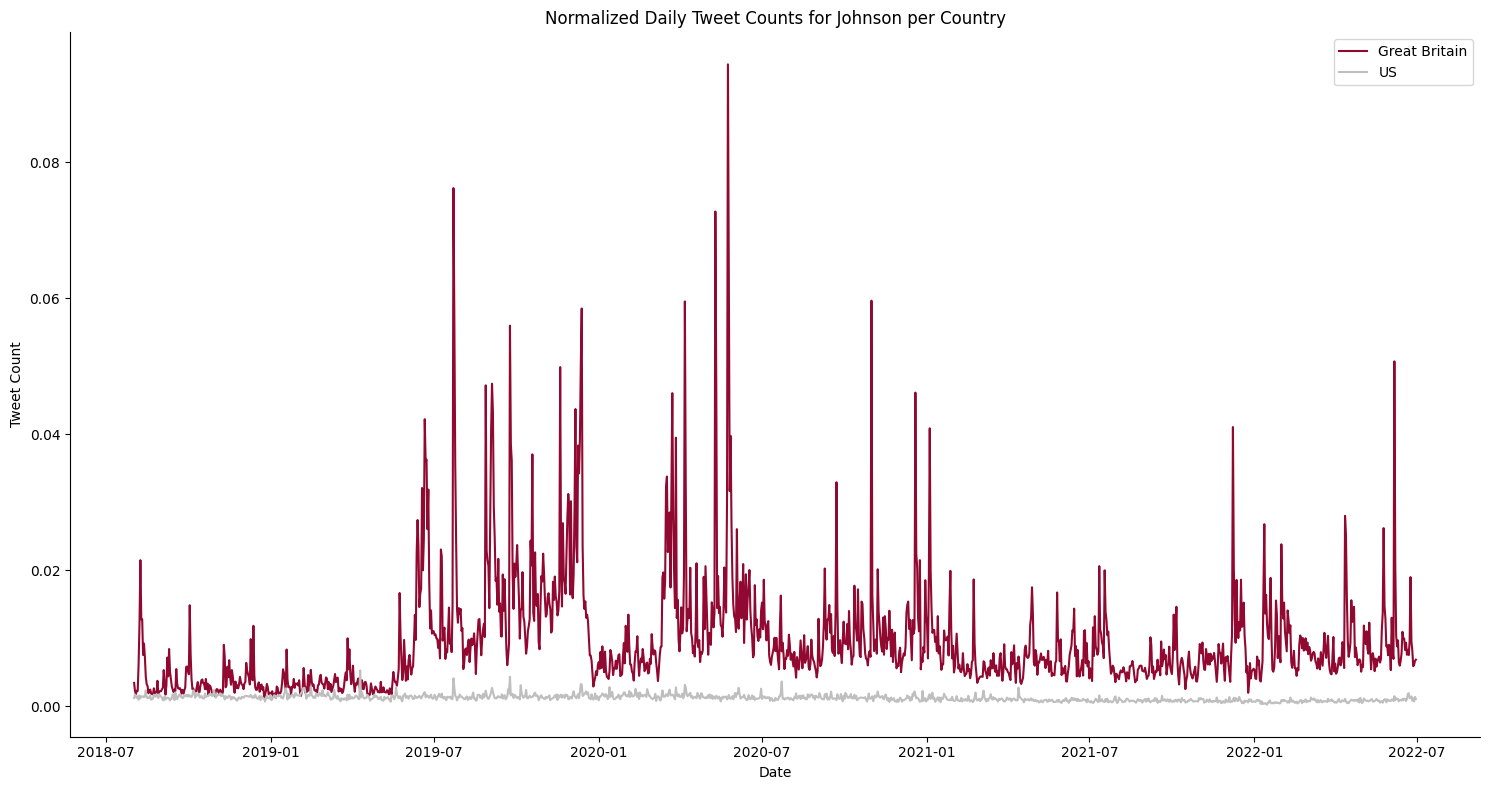

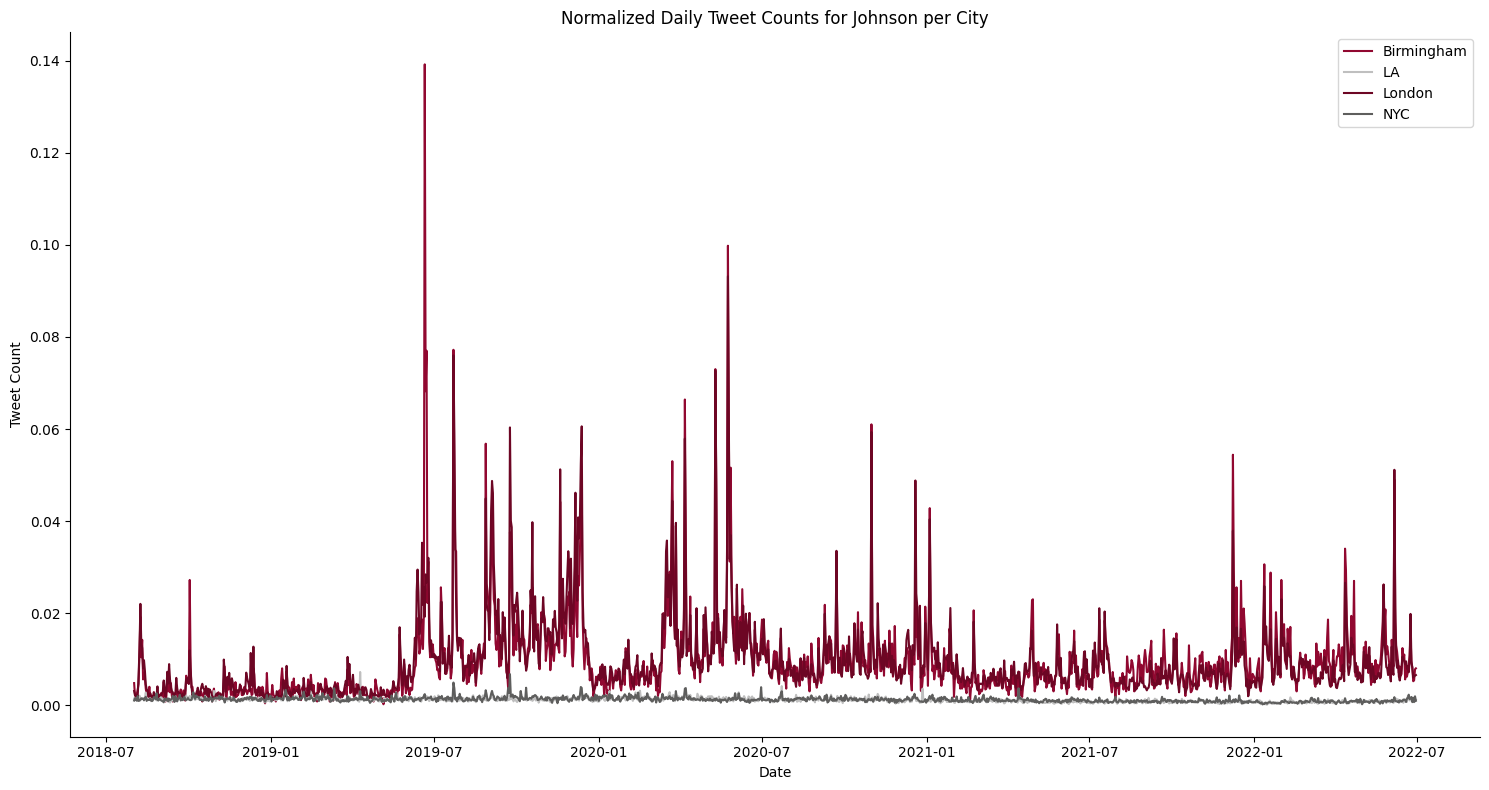

In [22]:
for president in presidents:
    data = daily_tweet_counts_trump if president == president[0] else daily_tweet_counts_johnson
    
    plot_daily_tweet_counts(
        tweet_counts=normalize(data, cols=['All']),
        title=f"Normalized Daily Tweet Counts for {president.capitalize()}",
        count_columns=['All'],
        save_path=f'visualizations/tweet_count/{president}-tweet_count.png'  
    )

    plot_daily_tweet_counts(
        tweet_counts=normalize(data, cols=countries),
        title=f"Normalized Daily Tweet Counts for {president.capitalize()} per Country",
        count_columns=countries,
        save_path=f'visualizations/tweet_count/{president}-countries-tweet_count.png'
    )

    plot_daily_tweet_counts(
        tweet_counts=normalize(data, cols=cities),
        title=f"Normalized Daily Tweet Counts for {president.capitalize()} per City",
        count_columns=cities,
        save_path=f'visualizations/tweet_count/{president}-cities-tweet_count.png'
    )

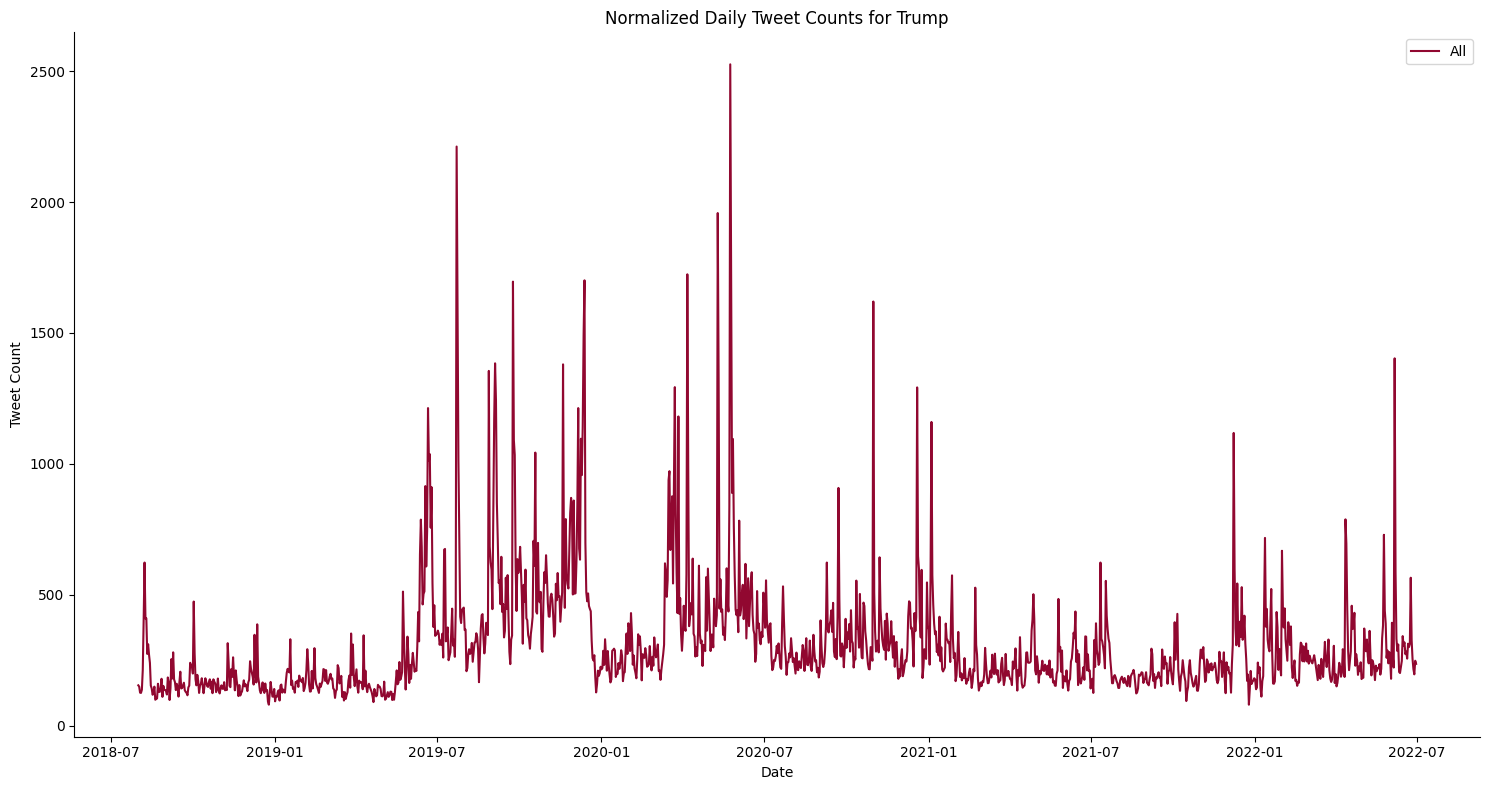

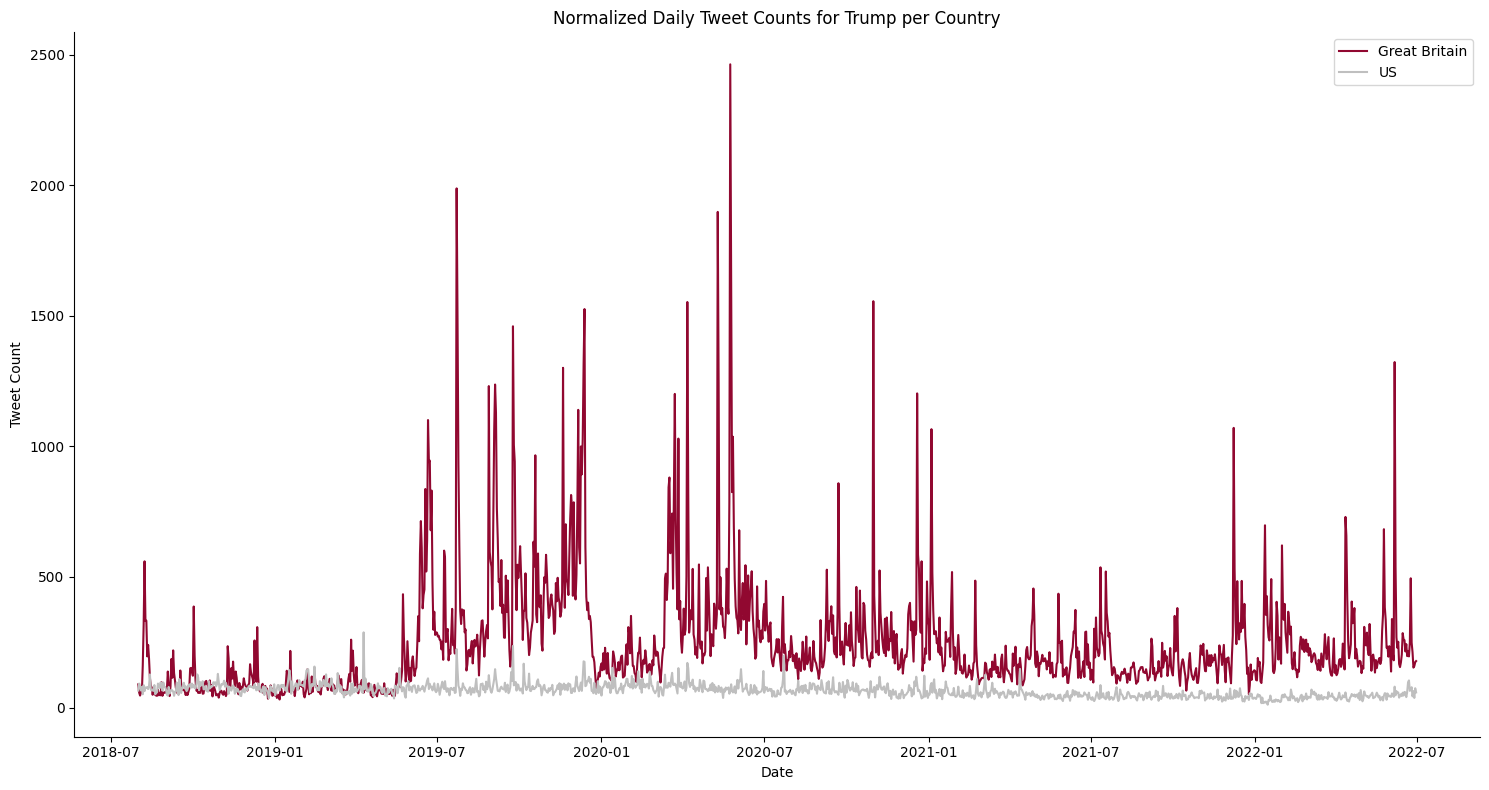

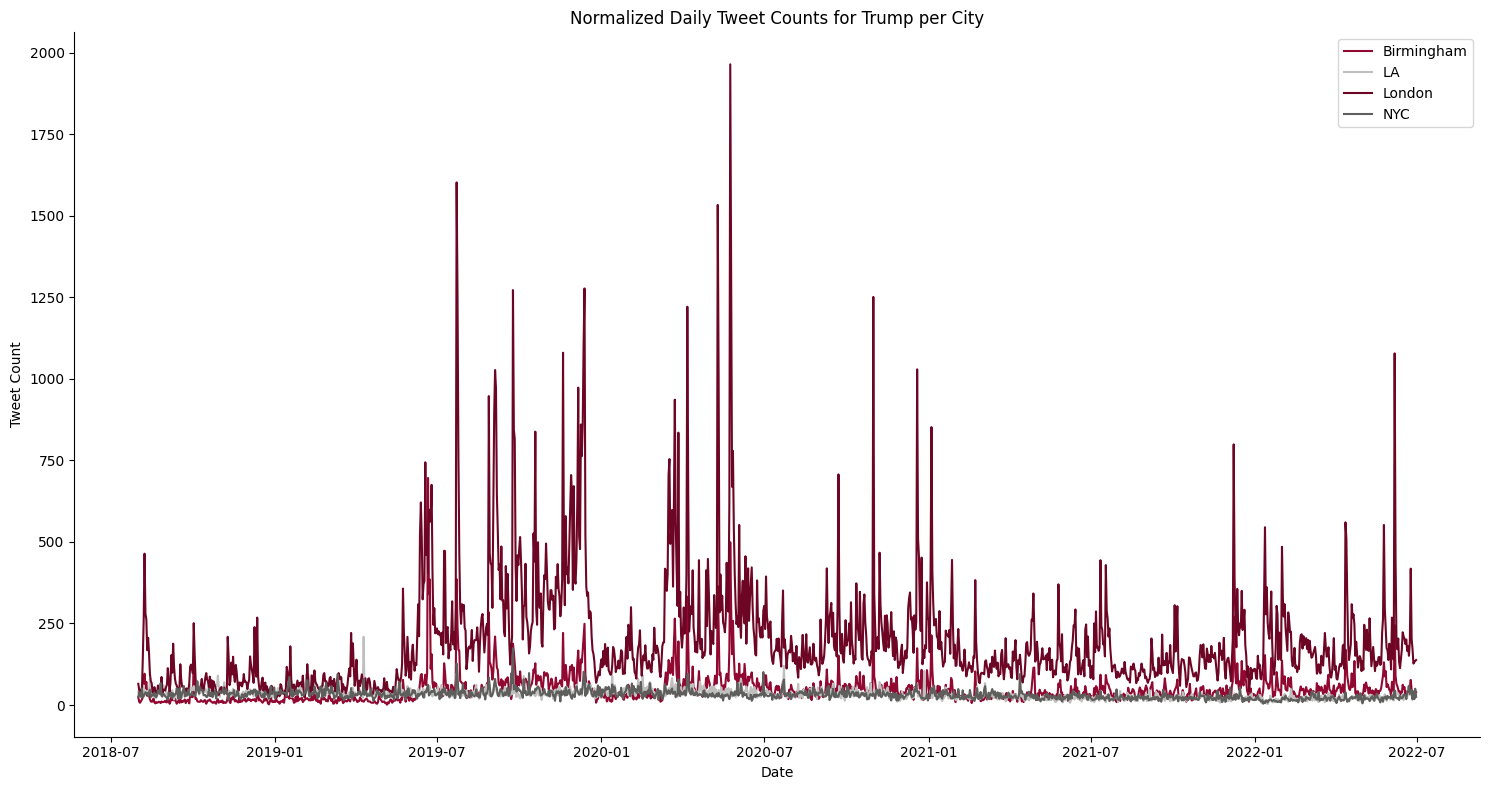

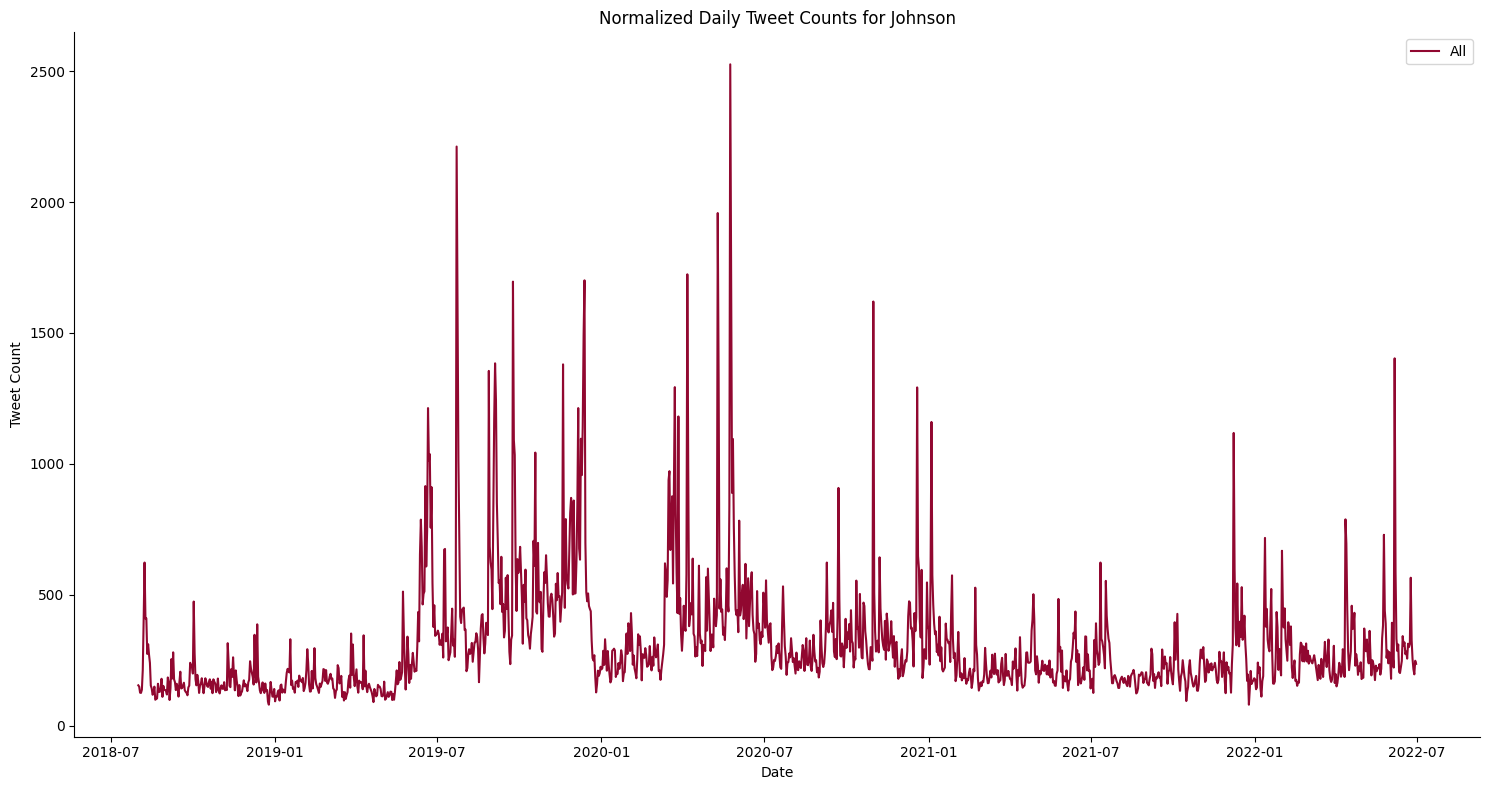

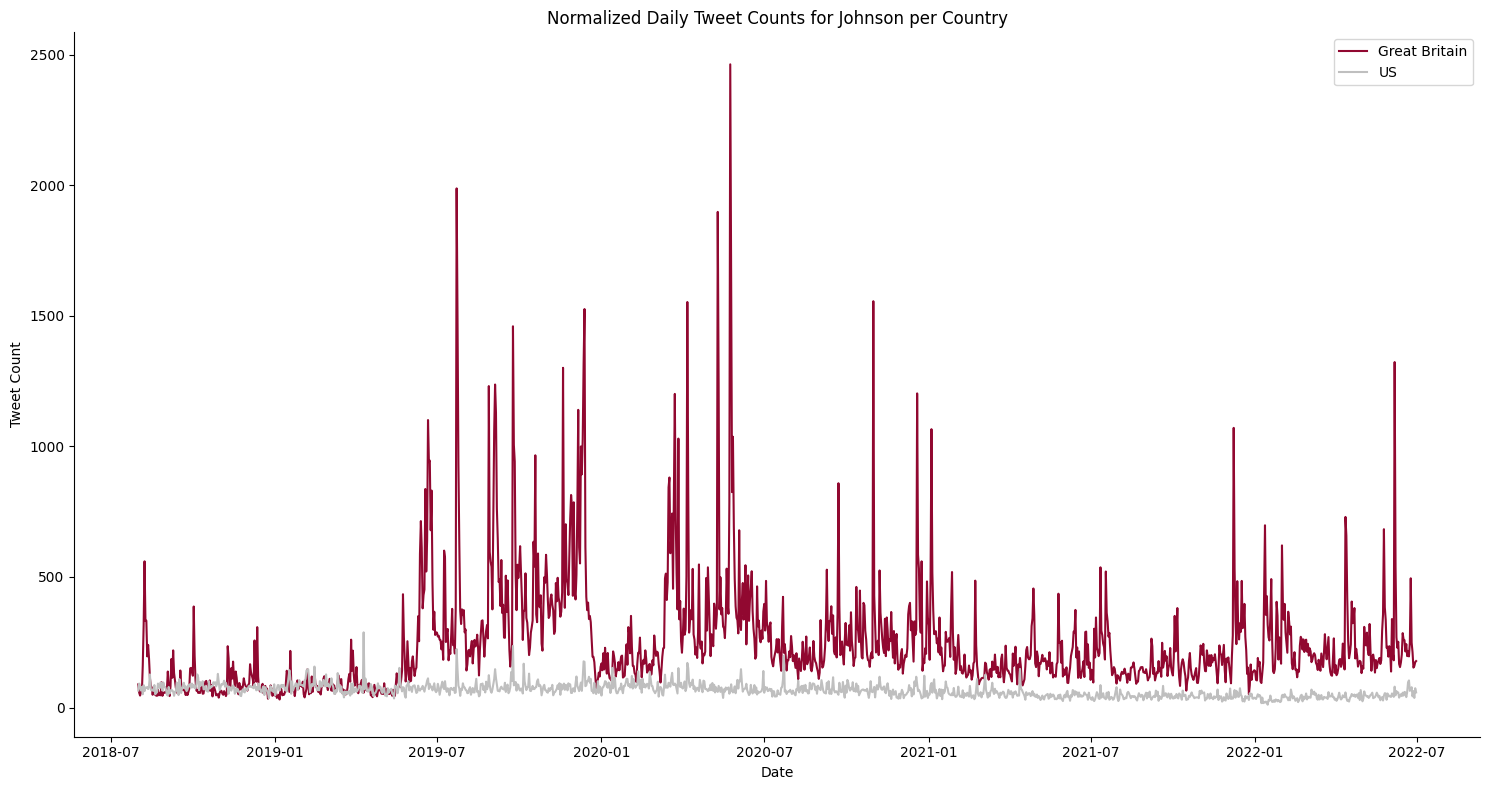

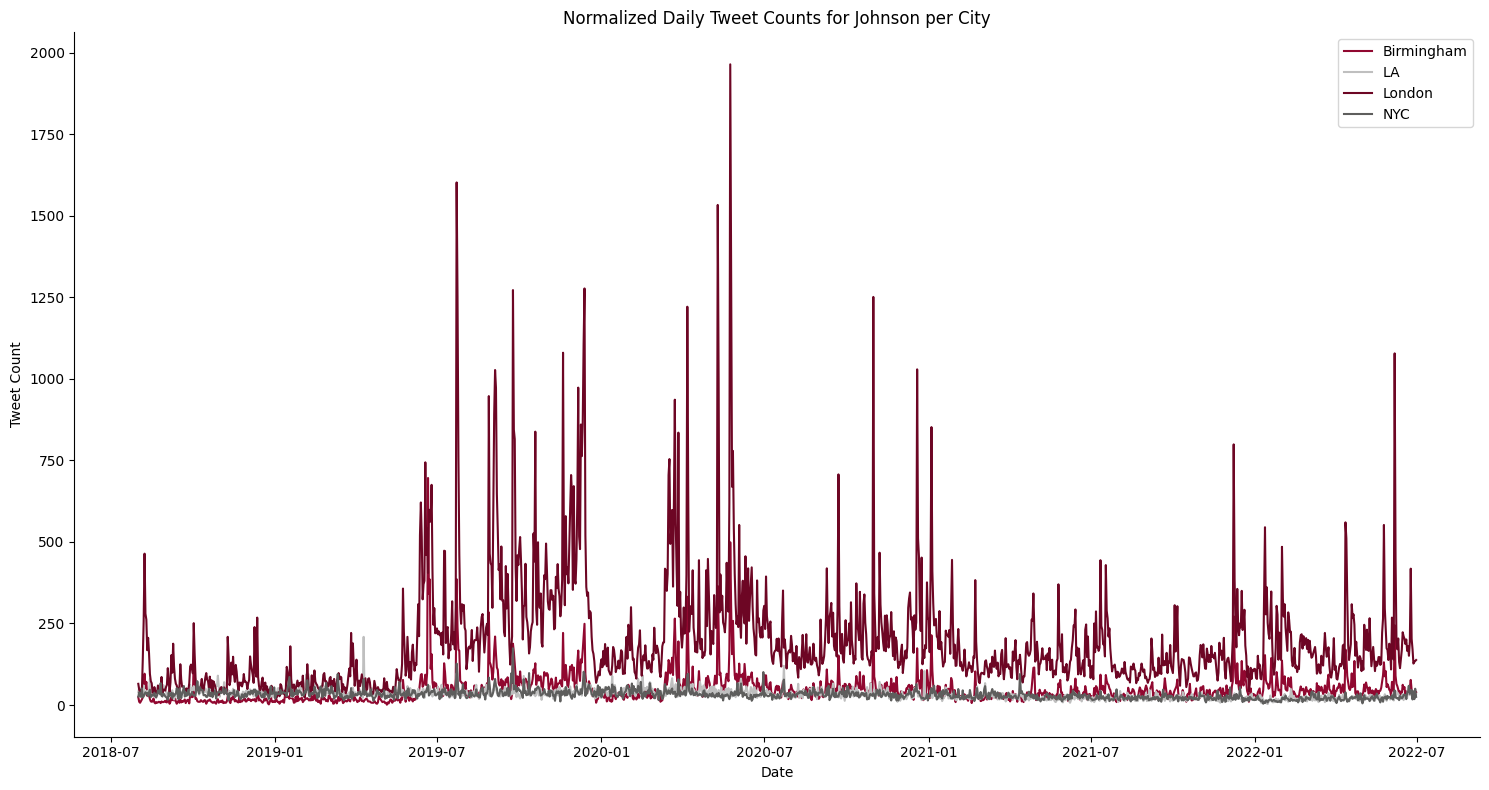

In [23]:
for president in presidents:
    data = daily_tweet_counts_trump if president == president[0] else daily_tweet_counts_johnson
    
    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Normalized Daily Tweet Counts for {president.capitalize()}",
        count_columns=['All'],
        save_path=f'visualizations/tweet_count/{president}-tweet_count.png'  
    )

    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Normalized Daily Tweet Counts for {president.capitalize()} per Country",
        count_columns=countries,
        save_path=f'visualizations/tweet_count/{president}-countries-tweet_count.png'
    )

    plot_daily_tweet_counts(
        tweet_counts=data,
        title=f"Normalized Daily Tweet Counts for {president.capitalize()} per City",
        count_columns=cities,
        save_path=f'visualizations/tweet_count/{president}-cities-tweet_count.png'
    )

### Interpretation Tweet Count

After one or at maximum 4 days, Twitter does not talk about scandals as much ->  News seem to become irrelevant after a couple of days